In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
drawgraph = True

In [3]:
employee_train = pd.read_csv('D:/employee_attrition_train.csv')
employee_test = pd.read_csv('D:/employee_attrition_test.csv')
employee = pd.concat([employee_train, employee_test])
pd.set_option('display.max_columns', None)
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 440
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1279 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   DailyRate                 1429 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1321 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel 

In [5]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1279.000000,1429.000000,1321.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.951525,800.657803,9.792581,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.226035,404.296047,8.335083,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,464.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,798.000000,8.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1157.000000,15.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
def val_null_ratio(target): #value_counts, null 개수, null 비율
    global employee
    if drawgraph:
        nulltot = employee[target].isnull().sum()
        print('-- value_counts --')
        print(employee[target].value_counts())
        print('\n-- null count --')
        print(nulltot)
        print('\n-- null ratio --')
        print((nulltot/employee[target].shape[0]*100))

In [7]:
def ohe_add(target): #해당 feature를 OneHotEncoding하여 dataframe에 합침
    global employee
    encoder = OneHotEncoder(sparse_output=False)
    onehot = encoder.fit_transform(employee[[target]])
    onehot_df = pd.DataFrame(onehot, columns=encoder.categories_[0])
    employee.reset_index(drop=True, inplace=True)
    employee = pd.concat([employee, onehot_df], axis=1)

In [8]:
employee['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [9]:
val_null_ratio('Age')
employee['Age'].fillna(np.mean(employee['Age']), inplace=True)

-- value_counts --
34.0    77
36.0    69
31.0    69
29.0    68
32.0    61
30.0    60
38.0    58
33.0    58
40.0    57
37.0    50
27.0    48
42.0    46
39.0    42
45.0    41
41.0    40
44.0    33
46.0    33
43.0    32
50.0    30
24.0    26
47.0    24
49.0    24
55.0    22
48.0    19
51.0    19
53.0    19
54.0    18
52.0    18
22.0    16
58.0    14
56.0    14
23.0    14
21.0    13
20.0    11
59.0    10
19.0     9
18.0     8
60.0     5
57.0     4
Name: Age, dtype: int64

-- null count --
191

-- null ratio --
12.993197278911564


In [10]:
val_null_ratio('DailyRate')
val = employee['DailyRate'].value_counts().sort_index(ascending=True).reset_index()
data = np.array(val.iloc[:, 0])
weights = np.array(val.iloc[:, 1])
weighted_avg = np.average(data, weights=weights) #NaN을 weighted average로 채움
employee['DailyRate'].fillna(weighted_avg, inplace=True)

-- value_counts --
691.0     6
1082.0    5
329.0     5
1329.0    5
530.0     5
         ..
726.0     1
500.0     1
431.0     1
277.0     1
104.0     1
Name: DailyRate, Length: 867, dtype: int64

-- null count --
41

-- null ratio --
2.7891156462585034


In [11]:
val_null_ratio('DistanceFromHome')
val = employee['DistanceFromHome'].value_counts().sort_index(ascending=True).reset_index()
data = np.array(val.iloc[:, 0])
weights = np.array(val.iloc[:, 1])
weighted_avg = np.average(data, weights=weights) #NaN을 weighted average로 채움
employee['DistanceFromHome'].fillna(weighted_avg, inplace=True)

-- value_counts --
2.0     211
1.0     208
10.0     86
9.0      85
7.0      84
8.0      80
4.0      64
6.0      59
16.0     32
11.0     29
24.0     28
29.0     27
23.0     27
18.0     26
15.0     26
26.0     25
25.0     25
20.0     25
28.0     23
19.0     22
14.0     21
12.0     20
17.0     20
13.0     19
22.0     19
21.0     18
27.0     12
Name: DistanceFromHome, dtype: int64

-- null count --
149

-- null ratio --
10.136054421768707


In [12]:
drop_list = []
le = LabelEncoder()

In [13]:
val_null_ratio('OverTime')
employee['OverTime'] = employee['OverTime'].map({'No':0, 'Yes':1}) #높으면 OverTime이라는 회귀 특성 생성
employee['OverTime'] = employee['OverTime'].astype('int32')

-- value_counts --
No     1054
Yes     416
Name: OverTime, dtype: int64

-- null count --
0

-- null ratio --
0.0


In [14]:
employee.drop('Over18', axis=1, inplace=True)

In [15]:
val_null_ratio('MaritalStatus')
employee.dropna(subset=['MaritalStatus'], inplace=True)
ohe_add('MaritalStatus') #OneHotEncoding
employee['MaritalStatus'] = le.fit_transform(employee['MaritalStatus'])
drop_list.append('MaritalStatus')

-- value_counts --
Married     667
Single      470
Divorced    325
Name: MaritalStatus, dtype: int64

-- null count --
8

-- null ratio --
0.5442176870748299


In [16]:
val_null_ratio('JobRole')
employee.drop('JobRole', axis=1, inplace=True) #데이터 개수에 비해 종류가 너무 많음

-- value_counts --
Sales Executive              324
Research Scientist           291
Laboratory Technician        257
Manufacturing Director       145
Healthcare Representative    130
Manager                      101
Sales Representative          83
Research Director             79
Human Resources               52
Name: JobRole, dtype: int64

-- null count --
0

-- null ratio --
0.0


In [17]:
val_null_ratio('Gender')
employee['Gender'] = employee['Gender'].map({'Female':0, 'Male':1})

-- value_counts --
Male      879
Female    583
Name: Gender, dtype: int64

-- null count --
0

-- null ratio --
0.0


In [18]:
val_null_ratio('EducationField')
employee.drop('EducationField', axis=1, inplace=True) #데이터 개수에 비해 종류가 너무 많음

-- value_counts --
Life Sciences       601
Medical             463
Marketing           157
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

-- null count --
0

-- null ratio --
0.0


In [19]:
val_null_ratio('BusinessTravel')
employee.dropna(subset=['BusinessTravel'], inplace=True)
#숫자가 높을수록 자주 여행 -> 회귀적 특성
employee['BusinessTravel'] = employee['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

-- value_counts --
Travel_Rarely        1028
Travel_Frequently     276
Non-Travel            148
Name: BusinessTravel, dtype: int64

-- null count --
10

-- null ratio --
0.6839945280437756


In [20]:
val_null_ratio('Department')
ohe_add('Department') #OneHotEncoding
employee['Department'] = le.fit_transform(employee['Department'])
drop_list.append('Department')

-- value_counts --
Research & Development    950
Sales                     440
Human Resources            62
Name: Department, dtype: int64

-- null count --
0

-- null ratio --
0.0


In [21]:
employee.dropna(subset=['Attrition'], inplace=True)
employee['Attrition'] = le.fit_transform(employee['Attrition']) #정답 0 또는 1

In [22]:
employee.drop('EmployeeNumber', axis=1, inplace=True) #단순 개인 ID -> Drop

In [23]:
employee['EmployeeCount'].value_counts() #단일 숫자 -> Drop
employee.drop('EmployeeCount', axis=1, inplace=True)

In [24]:
employee['StandardHours'].value_counts() #단일 숫자 -> Drop
employee.drop('StandardHours', axis=1, inplace=True)

<Axes: >

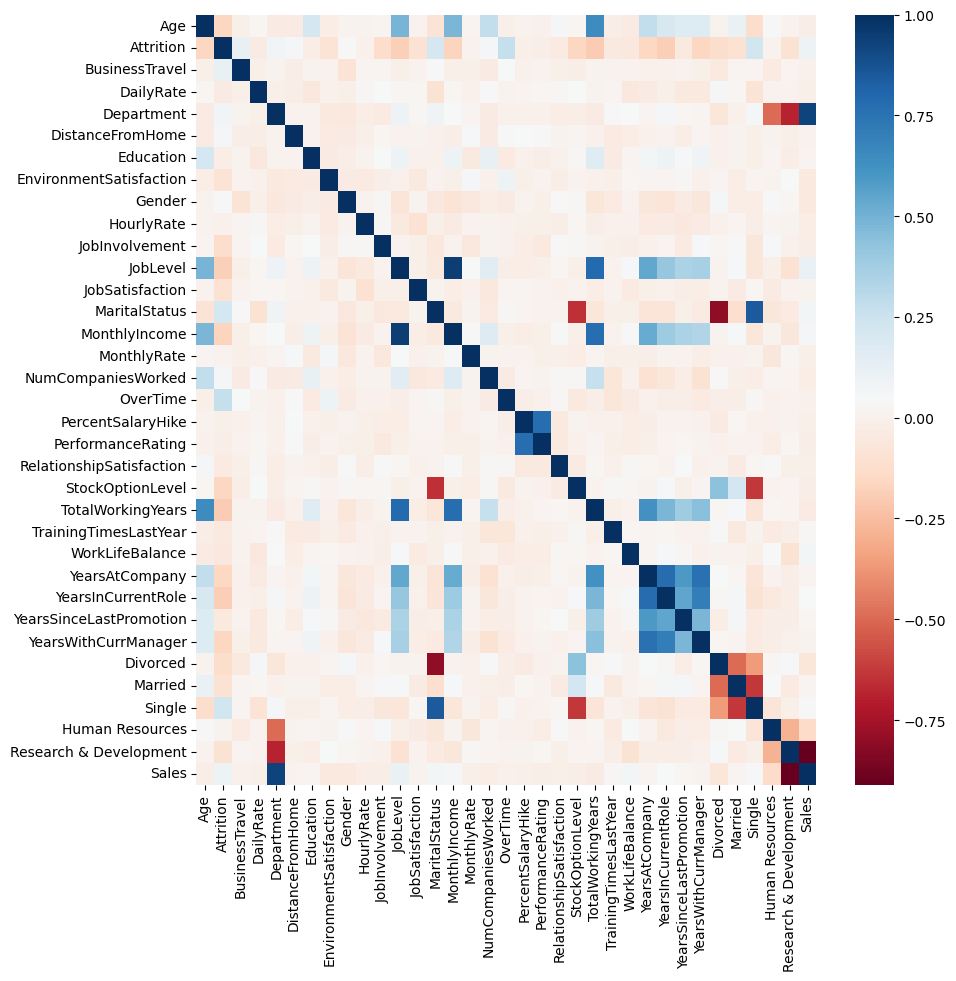

In [25]:
import seaborn as sb

plt.figure(figsize=(10,10))
sb.heatmap(employee.corr(), cmap='RdBu')

In [26]:
def show_01s(target):
    global employee
    if drawgraph:
        grouped = employee.groupby(target)['Attrition'].value_counts().unstack()
        ax = plt.subplot()
        ax.bar(grouped.index - 0.2, grouped[0], width=0.4)
        ax.bar(grouped.index + 0.2, grouped[1], width=0.4)
        ax.set_xlabel(target)
        ax.set_xticks(grouped.index, grouped.index, rotation=90)
        plt.show()

In [27]:

def collect_ratio(feature, obj):
    global df_ratio
    obj_ = obj.value_counts().reset_index()
    obj_cnt = obj_.iloc[:, 1]
    if obj_.shape[0] == 2:
        df_ratio[feature] = np.array([obj_cnt.iloc[0]/obj.shape[0] * 100, obj_cnt.iloc[1]/obj.shape[0] * 100, obj_cnt.iloc[0], obj_cnt.iloc[1]]).reshape(-1,1)
    else:
        if obj_.iloc[0, 0] == 0:
            df_ratio[feature] = np.array([100,0,obj_cnt.iloc[0],0]).reshape(-1,1)
        else:
            df_ratio[feature] = np.array([0,100,0 ,obj_cnt.iloc[0]]).reshape(-1,1)

In [28]:
def show_label_dist(target):
    global employee
    global df_ratio
    df_ratio = pd.DataFrame(index=['0(%)', '1(%)', '0_cnt', '1_cnt'])
    items = employee[target].value_counts().reset_index().iloc[:, 0]
    cols = 4
    rows = (items.shape[0] + cols - 1) // cols
    
    if drawgraph:
        fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 2.5*rows))
        fig.subplots_adjust(wspace=0.2, hspace=0.5)
        fig.suptitle('Attrition per class')
    for i, item in enumerate(items):
        df_ = employee[employee[target] == item][['Attrition']]
        if drawgraph:
            if rows <= 1:
                axs[i%cols].aspect = 0.5
                axs[i%cols].scatter(df_.index, df_['Attrition'])
                axs[i%cols].set_title(item)
            else:
                axs[i//cols][i%cols].aspect = 0.5
                axs[i//cols][i%cols].scatter(df_.index, df_['Attrition'])
                axs[i//cols][i%cols].set_title(item)
        collect_ratio(item, df_)
    plt.show()

In [29]:
def get_outlier(threshold_value_must, threshold_ratio, threshold_value):
    global df_ratio
    outlier_feature_value, outlier_feature_label = [], []
    for value in df_ratio.columns:
        if df_ratio.loc[:, value].iloc[0] <= threshold_value_must and df_ratio.loc[:, value].iloc[0] != 0:
            outlier_feature_value.append(value)
            outlier_feature_label.append(0)
        elif df_ratio.loc[:, value].iloc[1] <= threshold_value_must and df_ratio.loc[:, value].iloc[1] != 0:
            outlier_feature_value.append(value)
            outlier_feature_label.append(1)
        elif df_ratio.loc[:, value].iloc[0] <= threshold_ratio and df_ratio.loc[:, value].iloc[0] != 0 and df_ratio.loc[:, value].iloc[2] <= threshold_value:
            outlier_feature_value.append(value)
            outlier_feature_label.append(0)
        elif df_ratio.loc[:, value].iloc[1] <= threshold_ratio and df_ratio.loc[:, value].iloc[1] != 0 and df_ratio.loc[:, value].iloc[3] <= threshold_value:
            outlier_feature_value.append(value)
            outlier_feature_label.append(1)
    
    return outlier_feature_value, outlier_feature_label

In [30]:
def outlier_finder(target, threshold_value_must, threshold_ratio, threshold_value):
    global employee
    global outlier_feature_list, outlier_feature_values, outlier_feature_label_list
    show_label_dist(target)
    print(df_ratio.head())
    outlier_feature_value, outlier_feature_label = get_outlier(threshold_value_must, threshold_ratio, threshold_value)
    outlier_feature_list.append(target)
    outlier_feature_values.append(outlier_feature_value)
    outlier_feature_label_list.append(outlier_feature_label)
    print('To delete\t: ' + str(outlier_feature_value))
    print('To delete Attrition: ' + str(outlier_feature_label))

In [31]:
def showhisto(feature):
    global employee
    if drawgraph:
        fig, axs = plt.subplots(2, 1, figsize=(12, 3))
        axs[0].scatter(employee[feature], employee['Attrition'], c=employee['Attrition'], cmap = 'coolwarm')
        axs[0].set_xlabel('Attrition Distribution')
        d1 = employee[employee['Attrition'] == 0][feature].value_counts().sort_index()
        axs[1].scatter(d1.index, d1, c='blue')
        d2 = employee[employee['Attrition'] == 1][feature].value_counts().sort_index()
        axs[1].scatter(d2.index, d2, c='darkred')
        axs[1].set_xlabel('Attrition Count')
        fig.subplots_adjust(wspace=0.2, hspace=0.5)
        plt.show()
        fig, axs = plt.subplots(1, 3, figsize=(12, 1.5))
        axs[0].plot(d1.index, d1/d1.shape[0], c='blue')
        axs[0].plot(d2.index, d2/d2.shape[0], c='darkred')
        axs[0].set_xlabel('Attrition Ratio')
        axs[1].plot(d1.index, d1/d1.shape[0], c='blue')
        axs[1].set_xlabel('0 Ratio')
        axs[2].plot(d2.index, d2/d2.shape[0], c='darkred')
        axs[2].set_xlabel('1 Ratio')

In [32]:
df_ratio = None
outlier_feature_list = []
outlier_feature_values = []
outlier_feature_label_list = []
threshold_value_must = 3
threshold_ratio = 5
threshold_value = 5

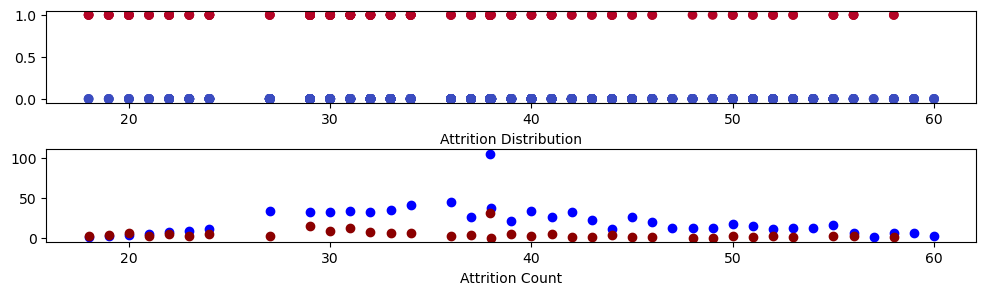

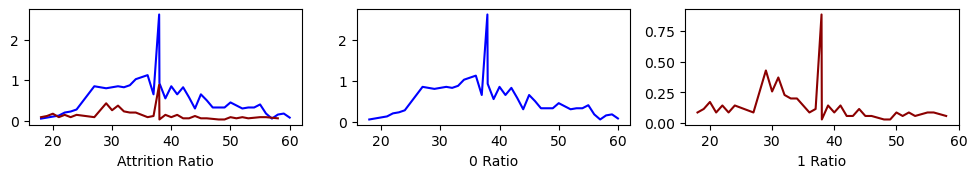

In [33]:
showhisto('Age')

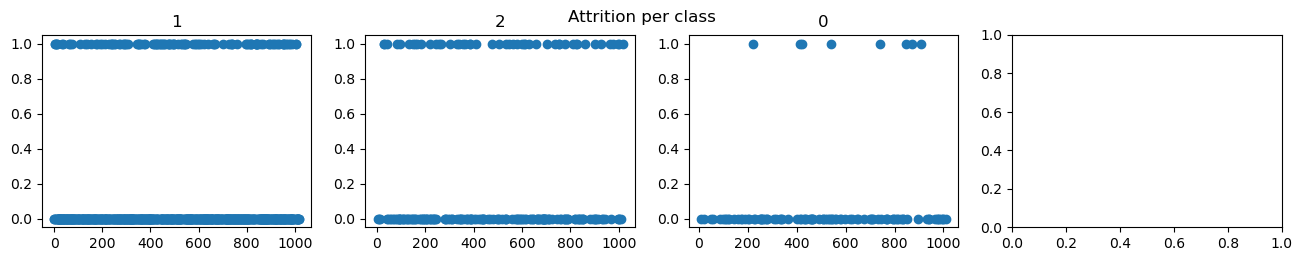

                1           2          0
0(%)    83.588317   75.376884  92.079208
1(%)    16.411683   24.623116   7.920792
0_cnt  601.000000  150.000000  93.000000
1_cnt  118.000000   49.000000   8.000000
To delete	: []
To delete Attrition: []


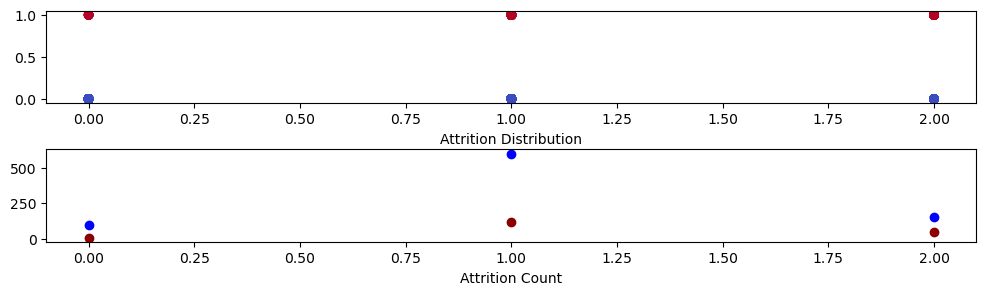

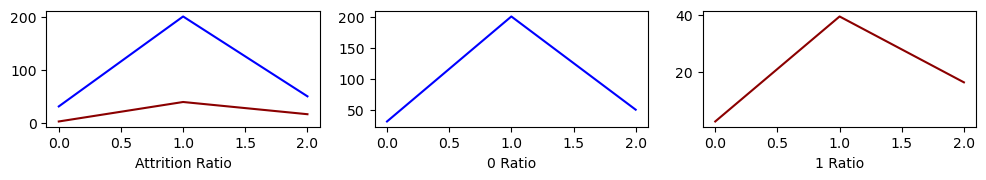

In [34]:
outlier_finder('BusinessTravel', threshold_value_must, threshold_ratio, threshold_value)
showhisto('BusinessTravel')

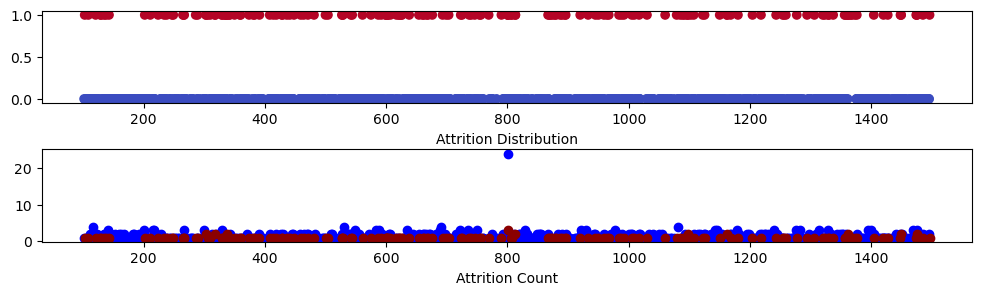

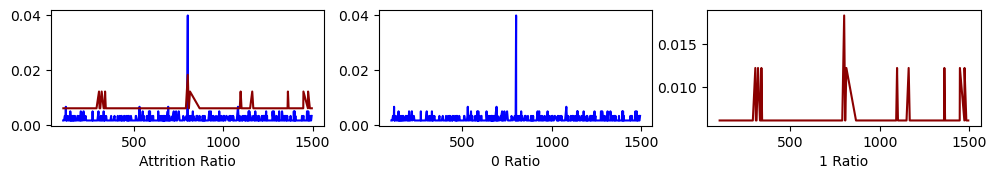

In [35]:
showhisto('DailyRate')

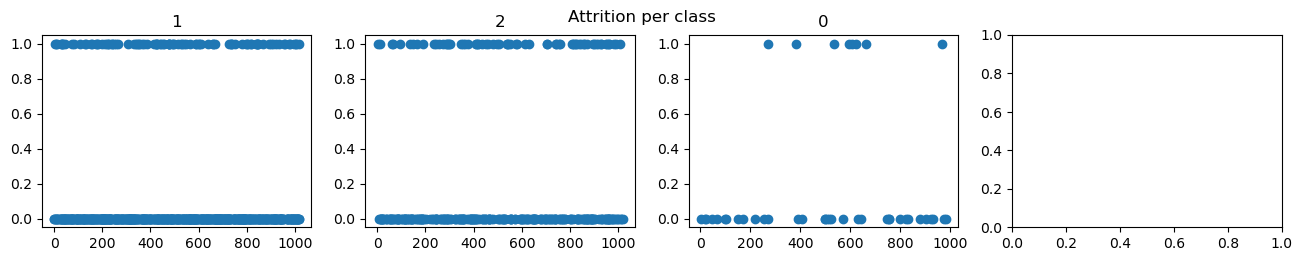

                1           2          0
0(%)    85.351271   77.597403  80.952381
1(%)    14.648729   22.402597  19.047619
0_cnt  571.000000  239.000000  34.000000
1_cnt   98.000000   69.000000   8.000000
To delete	: []
To delete Attrition: []


In [36]:
outlier_finder('Department', threshold_value_must, threshold_ratio, threshold_value)

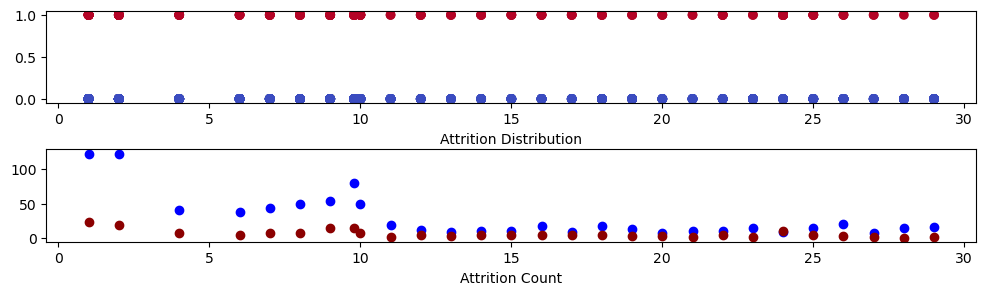

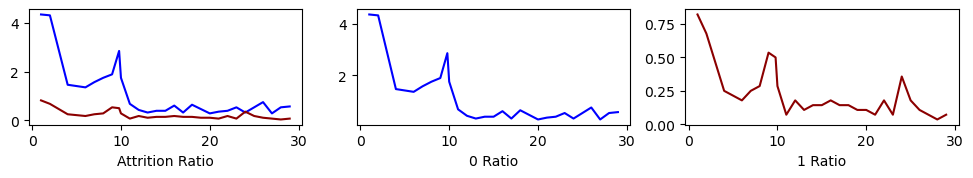

In [37]:
showhisto('DistanceFromHome')

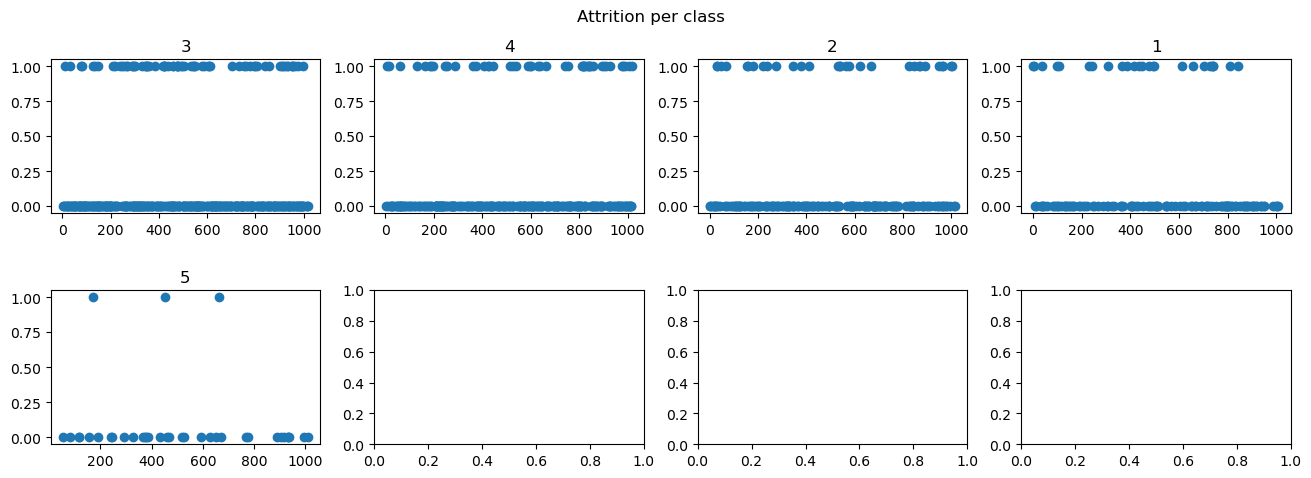

                3           4           2           1          5
0(%)    81.723238   83.093525   84.210526   81.060606  91.666667
1(%)    18.276762   16.906475   15.789474   18.939394   8.333333
0_cnt  313.000000  231.000000  160.000000  107.000000  33.000000
1_cnt   70.000000   47.000000   30.000000   25.000000   3.000000
To delete	: []
To delete Attrition: []


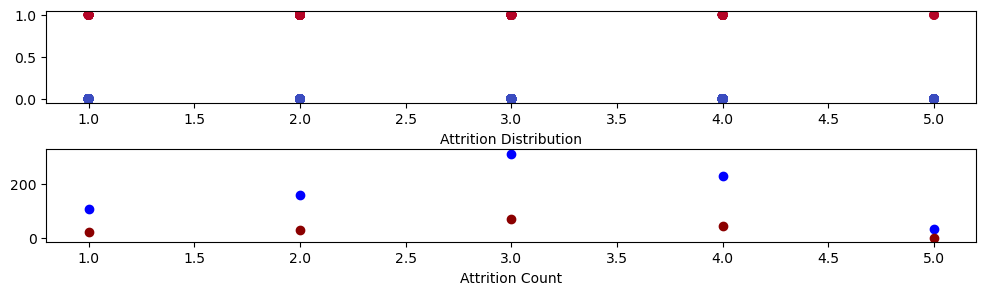

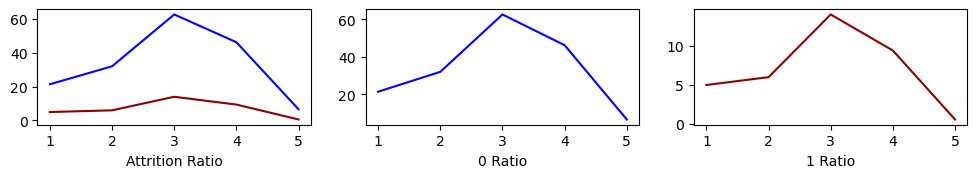

In [38]:
outlier_finder('Education', threshold_value_must, threshold_ratio, threshold_value)
showhisto('Education')

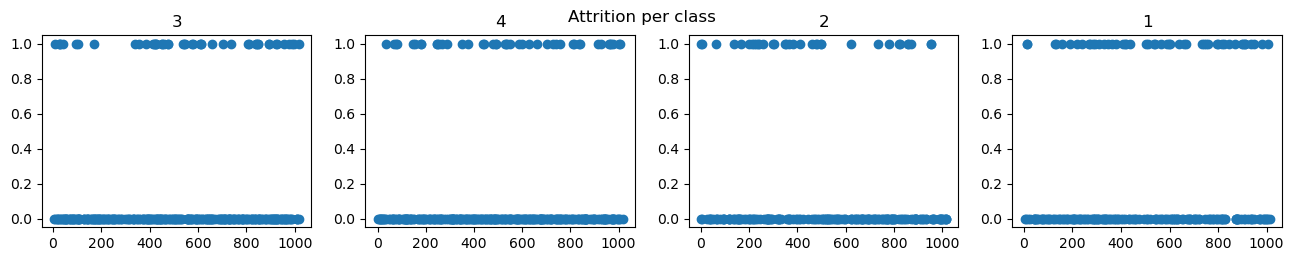

                3           4           2           1
0(%)    84.640523   85.234899   83.732057   75.728155
1(%)    15.359477   14.765101   16.267943   24.271845
0_cnt  259.000000  254.000000  175.000000  156.000000
1_cnt   47.000000   44.000000   34.000000   50.000000
To delete	: []
To delete Attrition: []


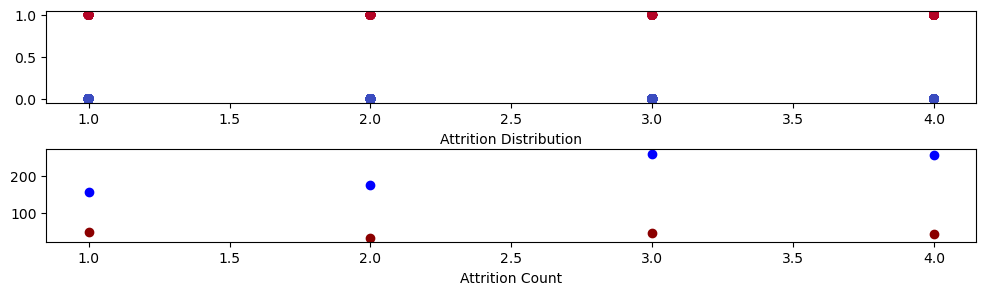

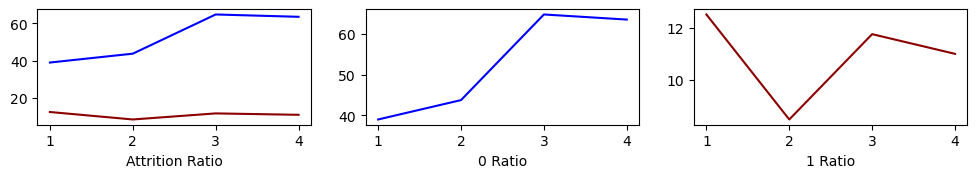

In [39]:
outlier_finder('EnvironmentSatisfaction', threshold_value_must, threshold_ratio, threshold_value)
showhisto('EnvironmentSatisfaction')

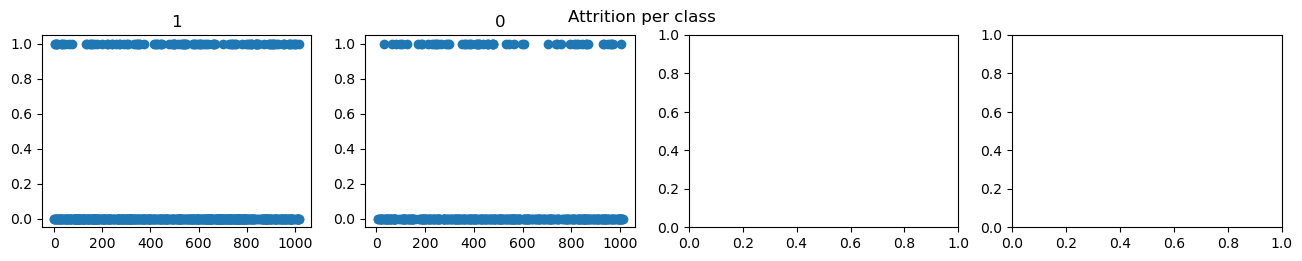

                1           0
0(%)    81.566069   84.729064
1(%)    18.433931   15.270936
0_cnt  500.000000  344.000000
1_cnt  113.000000   62.000000
To delete	: []
To delete Attrition: []


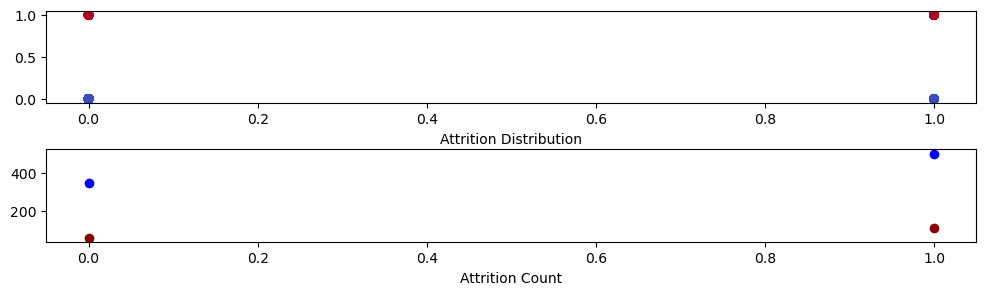

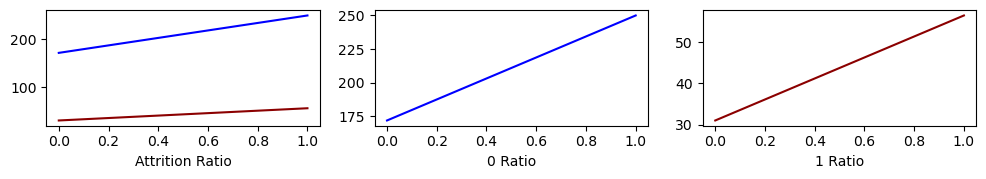

In [40]:
outlier_finder('Gender', threshold_value_must, threshold_ratio, threshold_value)
showhisto('Gender')

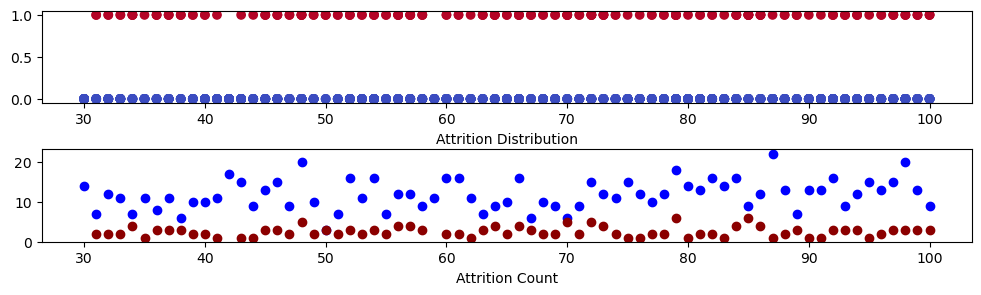

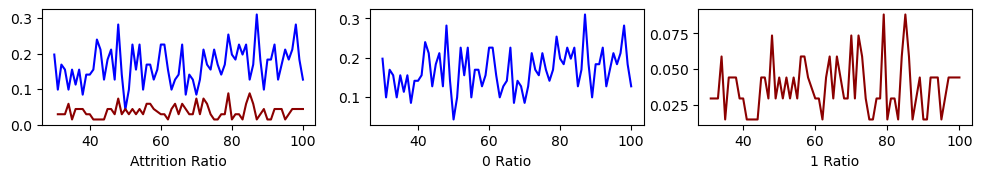

In [41]:
showhisto('HourlyRate')

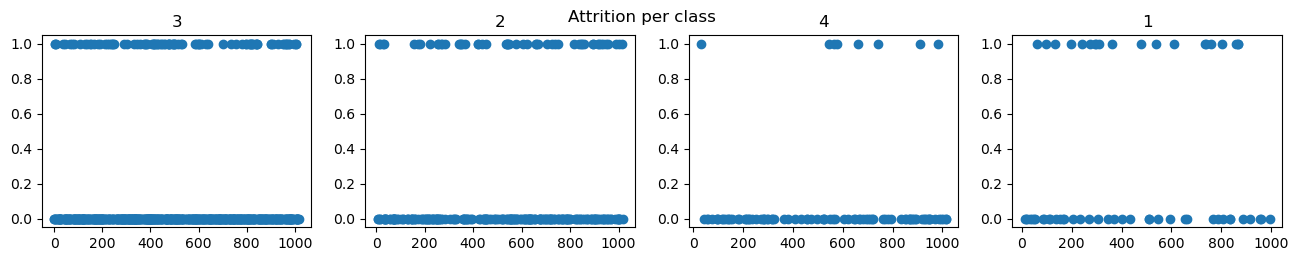

                3      2          4          1
0(%)    84.385382   80.0  91.397849  66.101695
1(%)    15.614618   20.0   8.602151  33.898305
0_cnt  508.000000  212.0  85.000000  39.000000
1_cnt   94.000000   53.0   8.000000  20.000000
To delete	: []
To delete Attrition: []


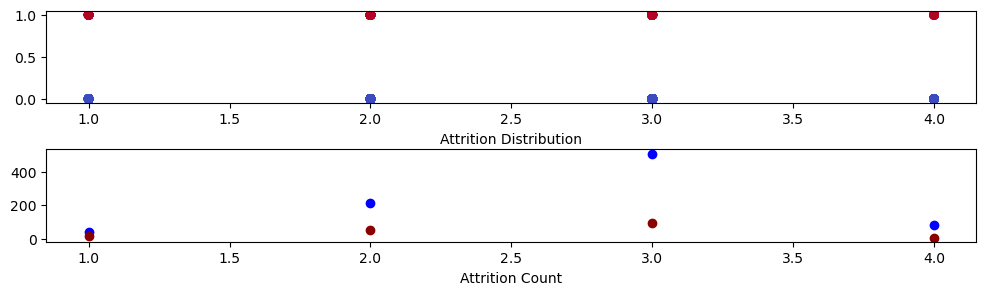

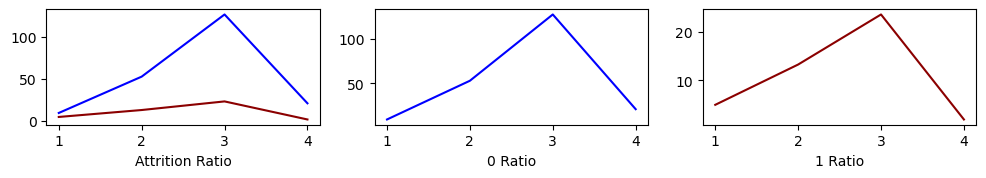

In [42]:
outlier_finder('JobInvolvement', threshold_value_must, threshold_ratio, threshold_value)
showhisto('JobInvolvement')

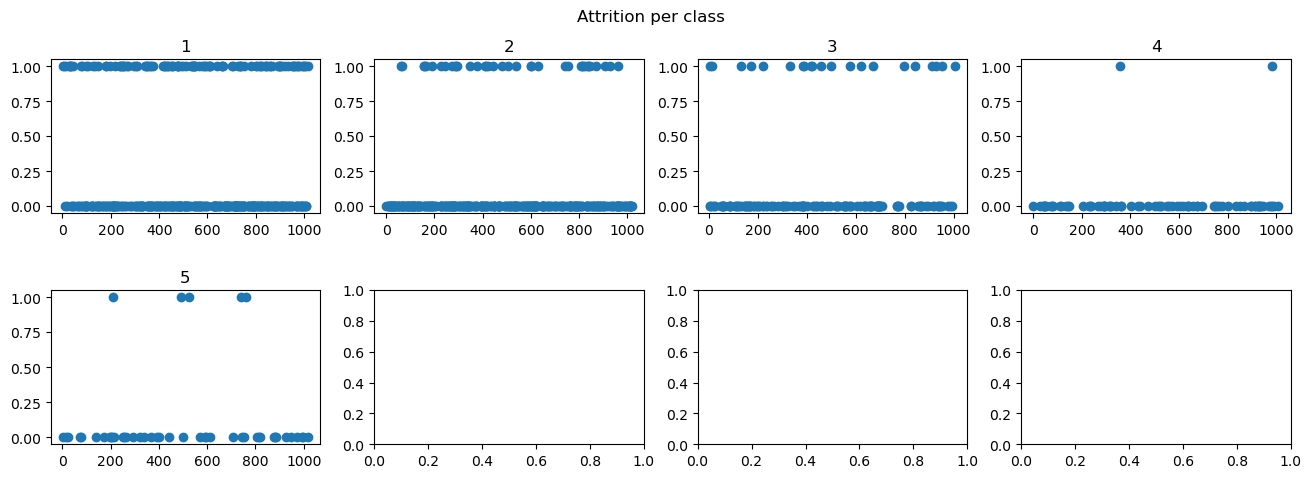

                1           2          3          4          5
0(%)    72.431078   89.337176   85.90604  97.435897  89.130435
1(%)    27.568922   10.662824   14.09396   2.564103  10.869565
0_cnt  289.000000  310.000000  128.00000  76.000000  41.000000
1_cnt  110.000000   37.000000   21.00000   2.000000   5.000000
To delete	: [4]
To delete Attrition: [1]


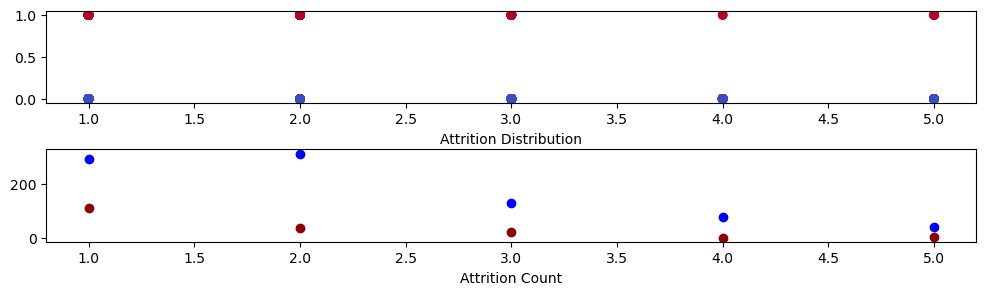

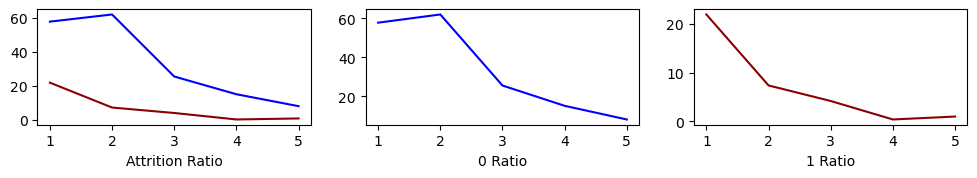

In [43]:
outlier_finder('JobLevel', threshold_value_must, threshold_ratio, threshold_value)
showhisto('JobLevel')

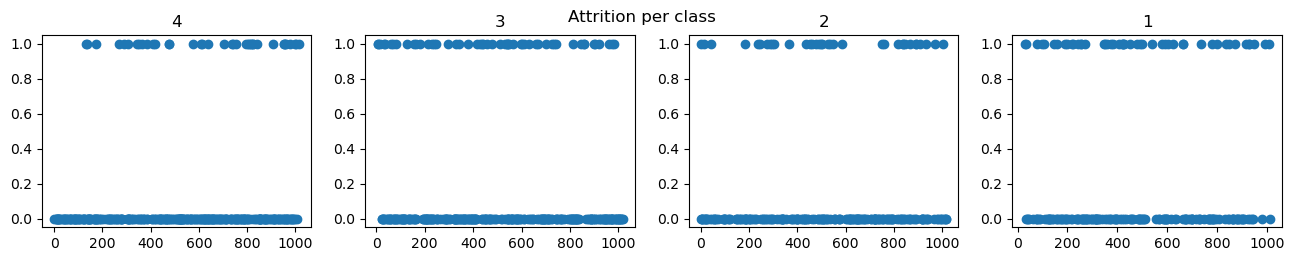

                4           3           2           1
0(%)    87.539936   82.214765   83.568075   75.384615
1(%)    12.460064   17.785235   16.431925   24.615385
0_cnt  274.000000  245.000000  178.000000  147.000000
1_cnt   39.000000   53.000000   35.000000   48.000000
To delete	: []
To delete Attrition: []


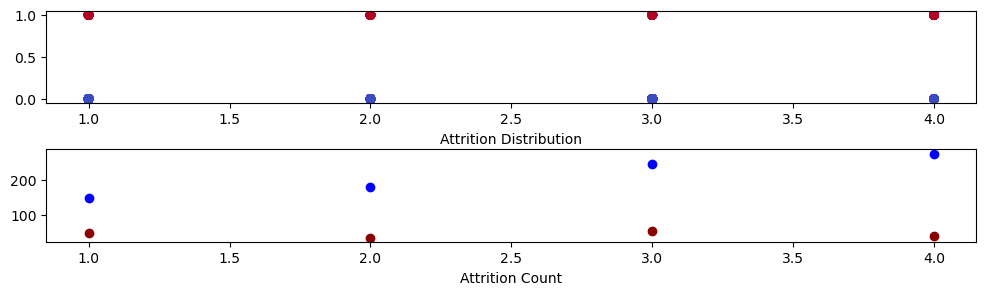

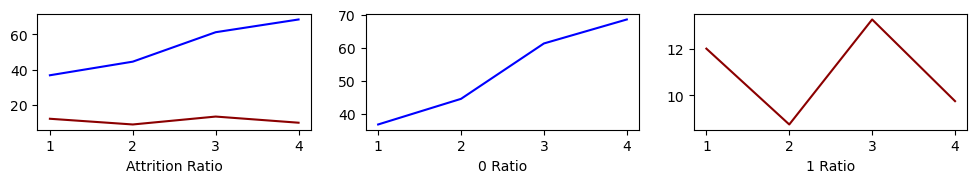

In [44]:
outlier_finder('JobSatisfaction', threshold_value_must, threshold_ratio, threshold_value)
showhisto('JobSatisfaction')

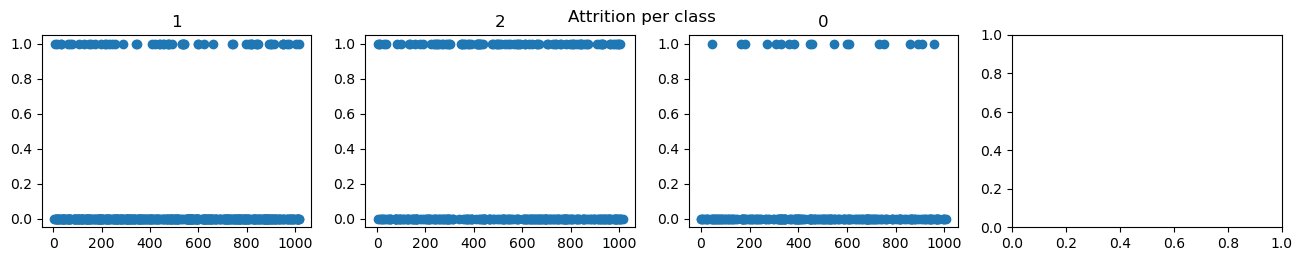

                1         2           0
0(%)    87.048832   70.3125   91.666667
1(%)    12.951168   29.6875    8.333333
0_cnt  410.000000  225.0000  209.000000
1_cnt   61.000000   95.0000   19.000000
To delete	: []
To delete Attrition: []


In [45]:
outlier_finder('MaritalStatus', threshold_value_must, threshold_ratio, threshold_value)

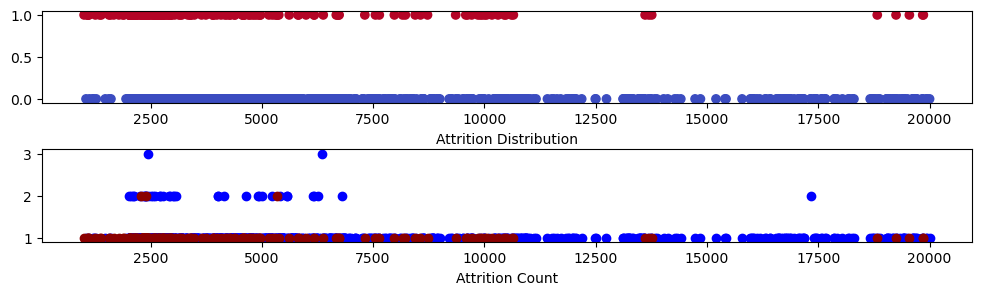

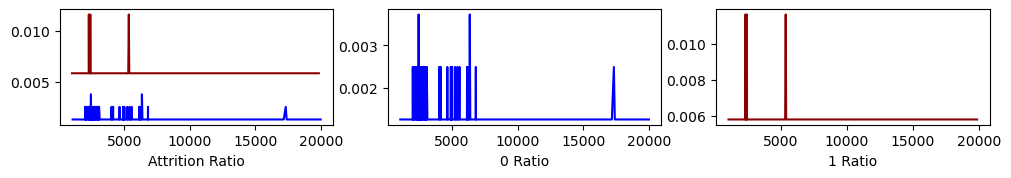

In [46]:
showhisto('MonthlyIncome')

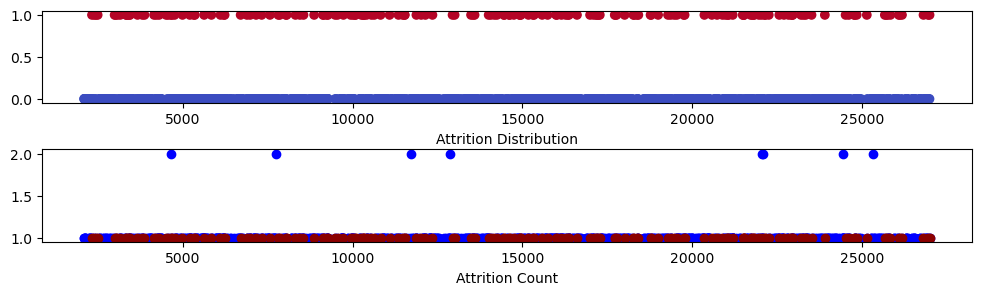

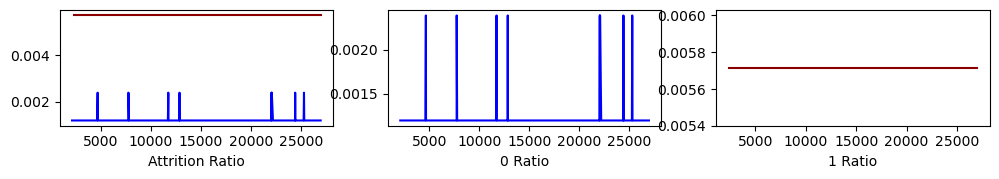

In [47]:
showhisto('MonthlyRate')

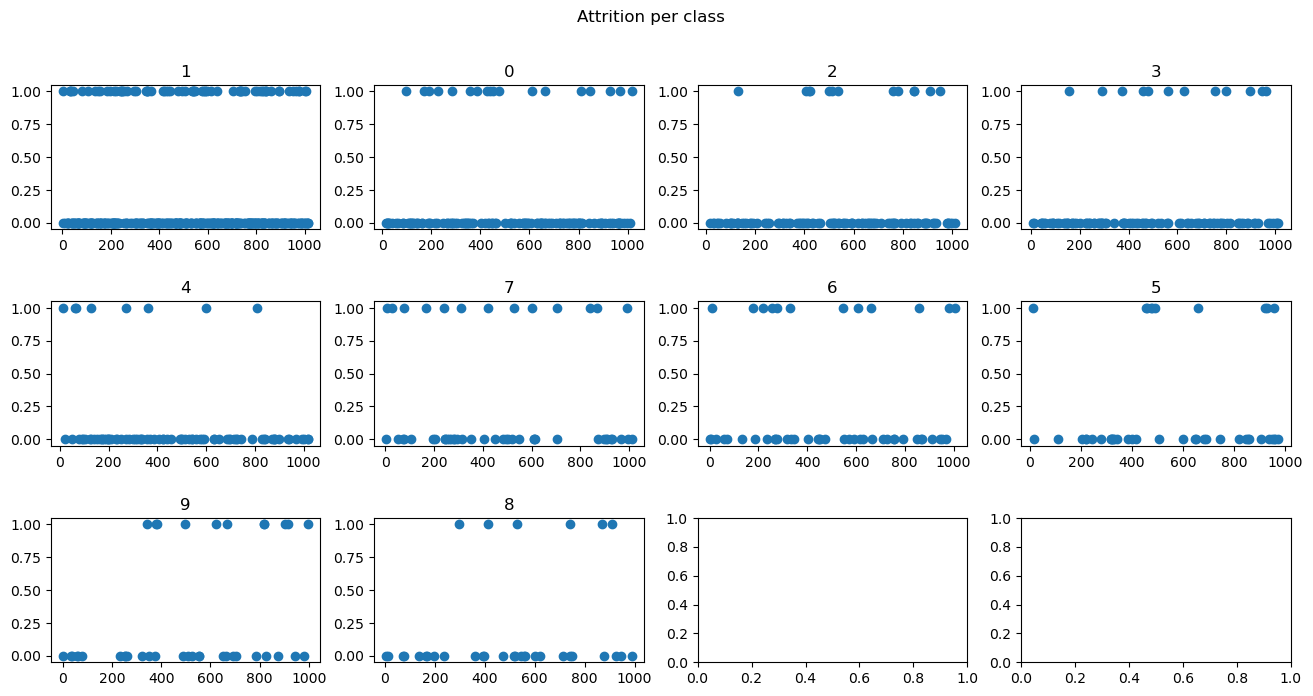

                1           0          2          3          4     7  \
0(%)    80.697051   86.861314  87.962963  88.571429  90.361446  74.0   
1(%)    19.302949   13.138686  12.037037  11.428571   9.638554  26.0   
0_cnt  301.000000  119.000000  95.000000  93.000000  75.000000  37.0   
1_cnt   72.000000   18.000000  13.000000  12.000000   8.000000  13.0   

               6          5          9          8  
0(%)   75.510204  76.744186  71.052632  81.818182  
1(%)   24.489796  23.255814  28.947368  18.181818  
0_cnt  37.000000  33.000000  27.000000  27.000000  
1_cnt  12.000000  10.000000  11.000000   6.000000  
To delete	: []
To delete Attrition: []


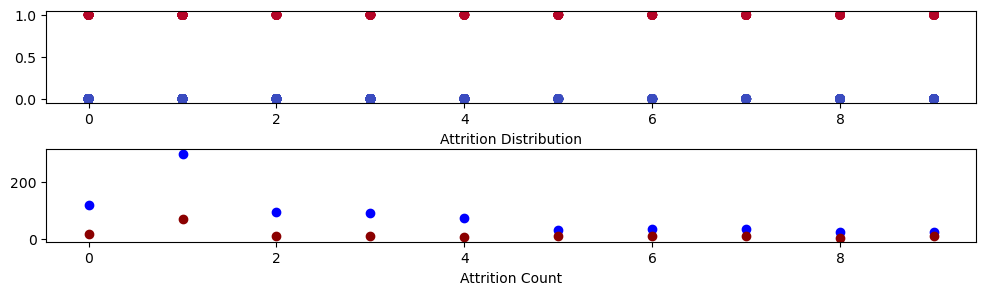

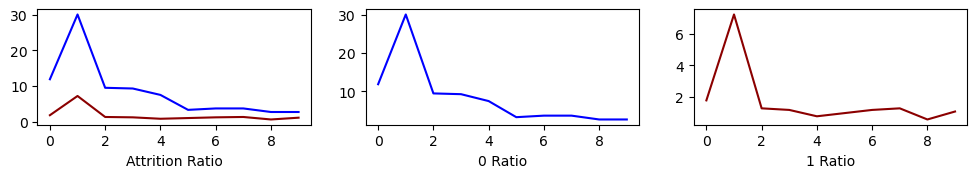

In [48]:
outlier_finder('NumCompaniesWorked', threshold_value_must, threshold_ratio, threshold_value)
showhisto('NumCompaniesWorked')

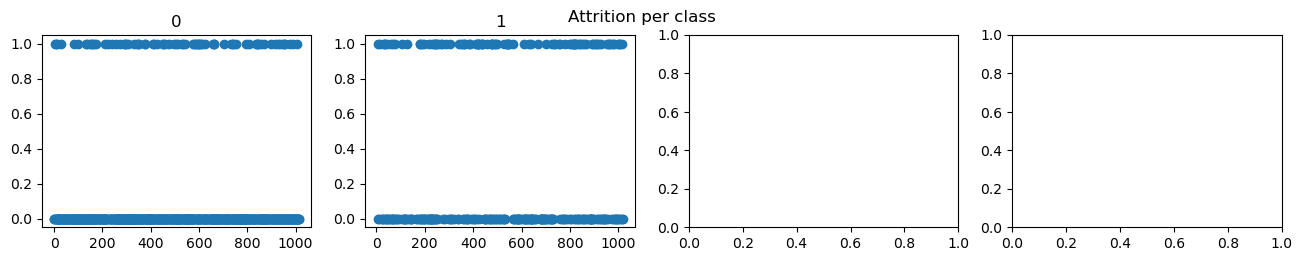

                0           1
0(%)    89.349931   66.891892
1(%)    10.650069   33.108108
0_cnt  646.000000  198.000000
1_cnt   77.000000   98.000000
To delete	: []
To delete Attrition: []


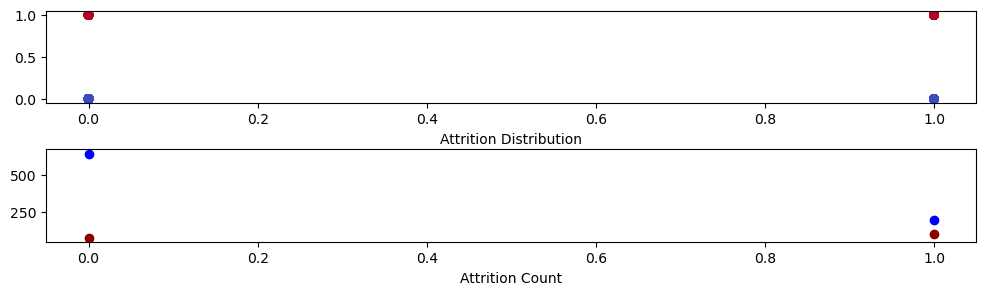

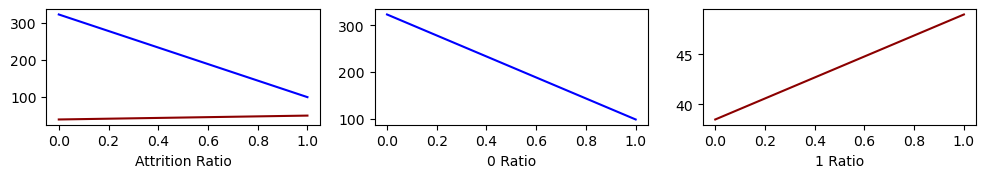

In [49]:
outlier_finder('OverTime', threshold_value_must, threshold_ratio, threshold_value)
showhisto('OverTime')

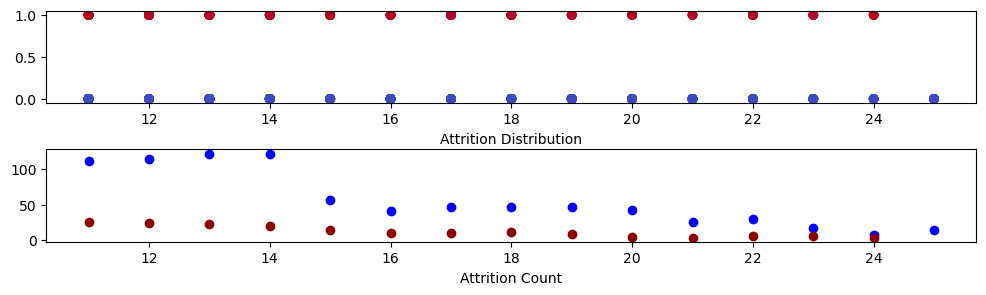

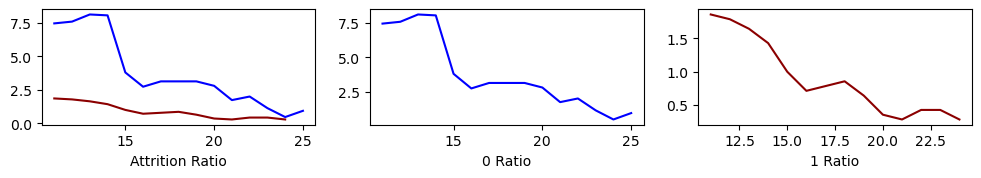

In [50]:
showhisto('PercentSalaryHike')

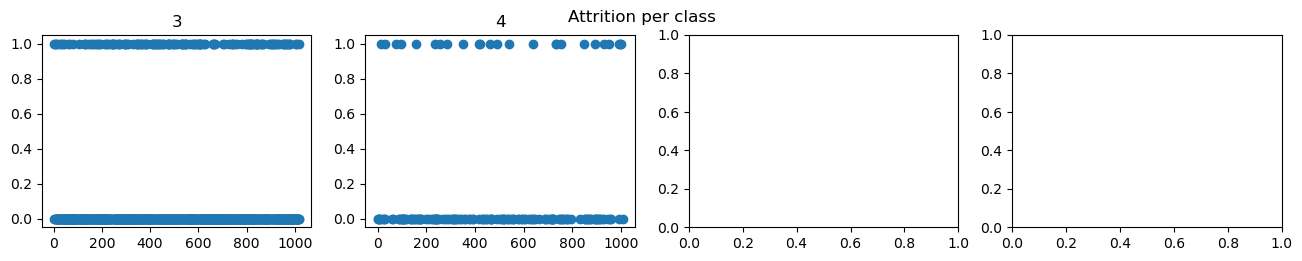

                3          4
0(%)    82.517483   84.47205
1(%)    17.482517   15.52795
0_cnt  708.000000  136.00000
1_cnt  150.000000   25.00000
To delete	: []
To delete Attrition: []


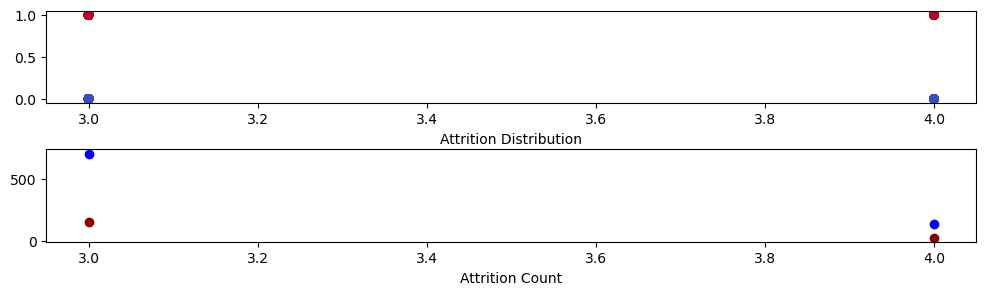

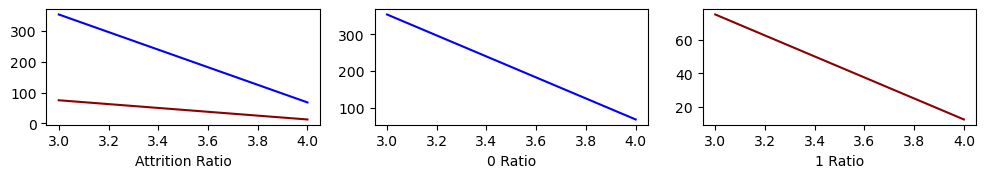

In [51]:
outlier_finder('PerformanceRating', threshold_value_must, threshold_ratio, threshold_value)
showhisto('PerformanceRating')

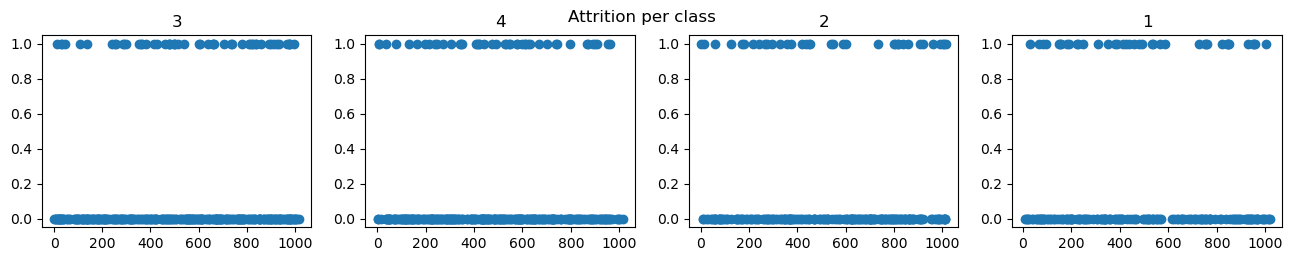

                3           4           2           1
0(%)    83.018868   84.482759   83.710407   78.947368
1(%)    16.981132   15.517241   16.289593   21.052632
0_cnt  264.000000  245.000000  185.000000  150.000000
1_cnt   54.000000   45.000000   36.000000   40.000000
To delete	: []
To delete Attrition: []


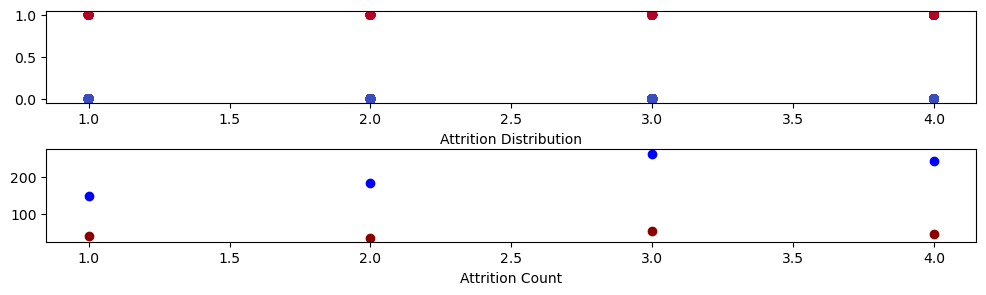

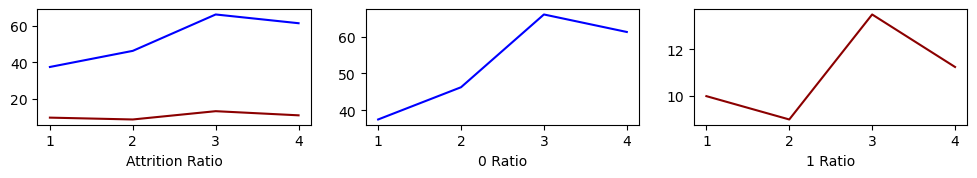

In [52]:
outlier_finder('RelationshipSatisfaction', threshold_value_must, threshold_ratio, threshold_value)
showhisto('RelationshipSatisfaction')

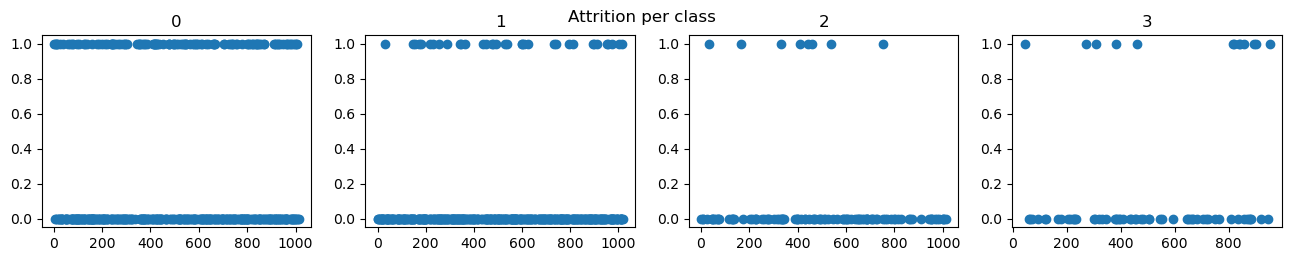

                0           1          2         3
0(%)    72.453704   91.442543   92.66055  81.15942
1(%)    27.546296    8.557457    7.33945  18.84058
0_cnt  313.000000  374.000000  101.00000  56.00000
1_cnt  119.000000   35.000000    8.00000  13.00000
To delete	: []
To delete Attrition: []


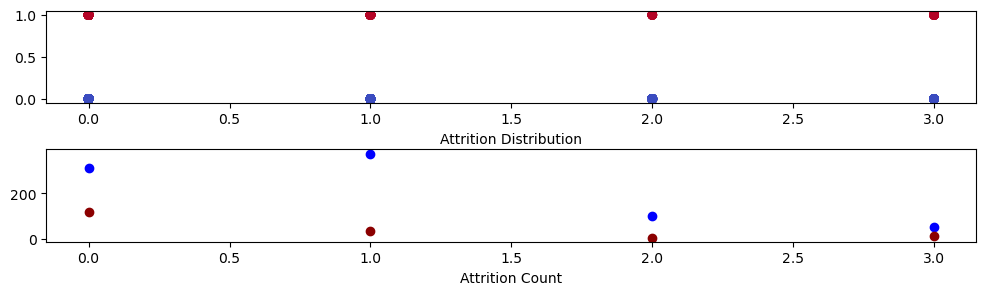

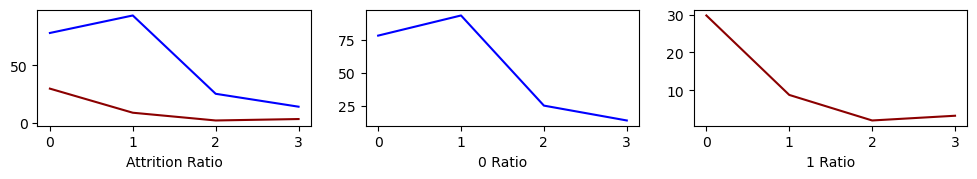

In [53]:
outlier_finder('StockOptionLevel', threshold_value_must, threshold_ratio, threshold_value)
showhisto('StockOptionLevel')

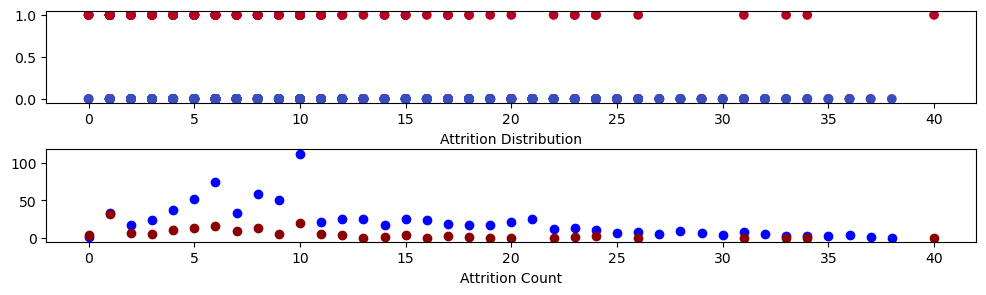

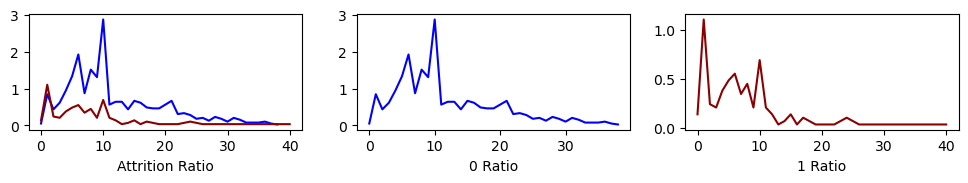

In [54]:
showhisto('TotalWorkingYears')

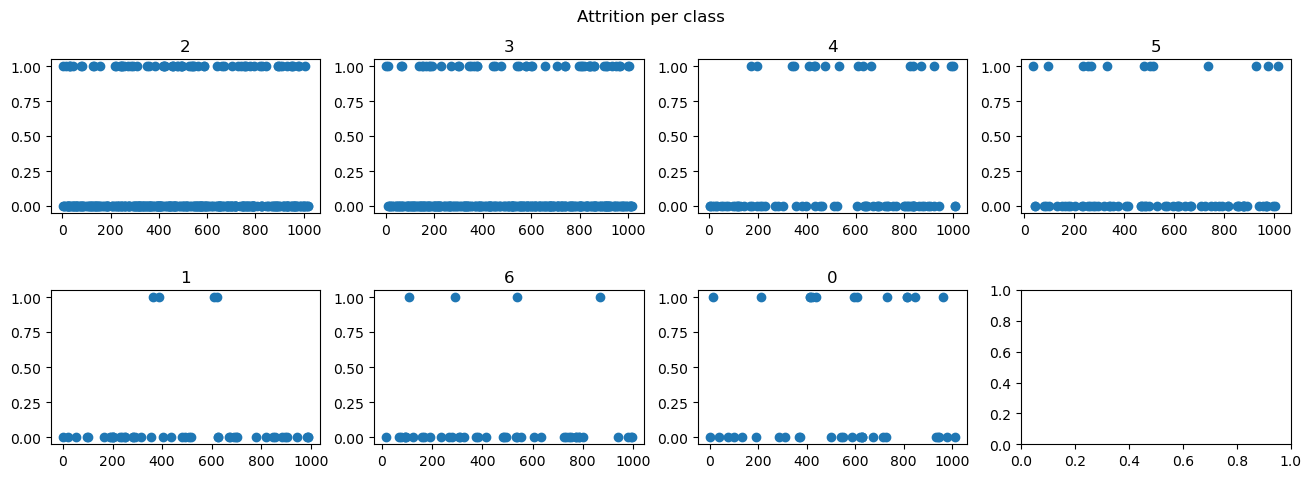

                2          3          4          5          1          6  \
0(%)    81.462141   84.83965  78.823529  83.116883  91.666667  90.909091   
1(%)    18.537859   15.16035  21.176471  16.883117   8.333333   9.090909   
0_cnt  312.000000  291.00000  67.000000  64.000000  44.000000  40.000000   
1_cnt   71.000000   52.00000  18.000000  13.000000   4.000000   4.000000   

               0  
0(%)   66.666667  
1(%)   33.333333  
0_cnt  26.000000  
1_cnt  13.000000  
To delete	: []
To delete Attrition: []


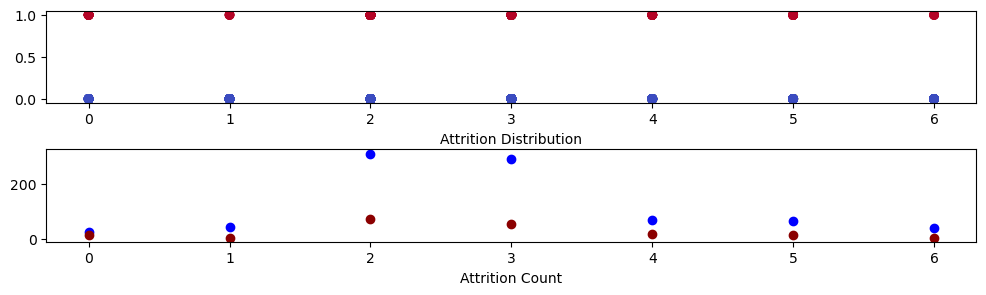

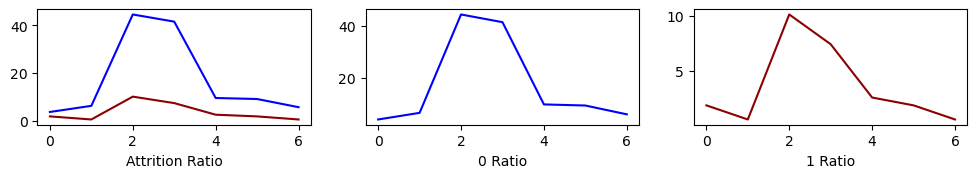

In [55]:
outlier_finder('TrainingTimesLastYear', threshold_value_must, threshold_ratio, threshold_value)
showhisto('TrainingTimesLastYear')

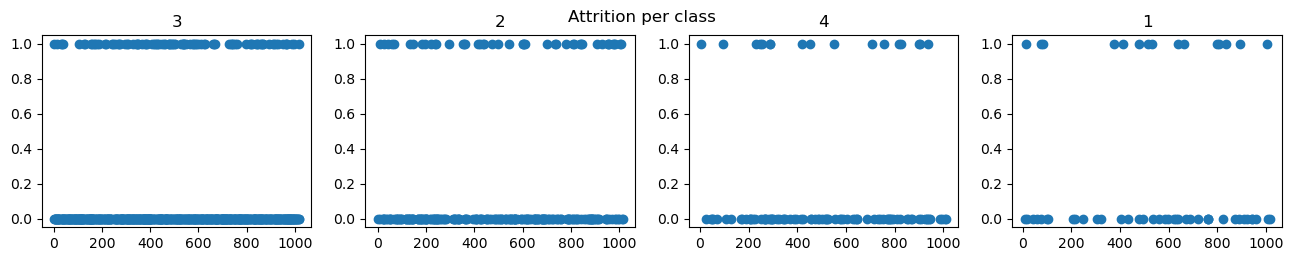

                3          2          4          1
0(%)    84.380032   81.22449  82.828283  72.222222
1(%)    15.619968   18.77551  17.171717  27.777778
0_cnt  524.000000  199.00000  82.000000  39.000000
1_cnt   97.000000   46.00000  17.000000  15.000000
To delete	: []
To delete Attrition: []


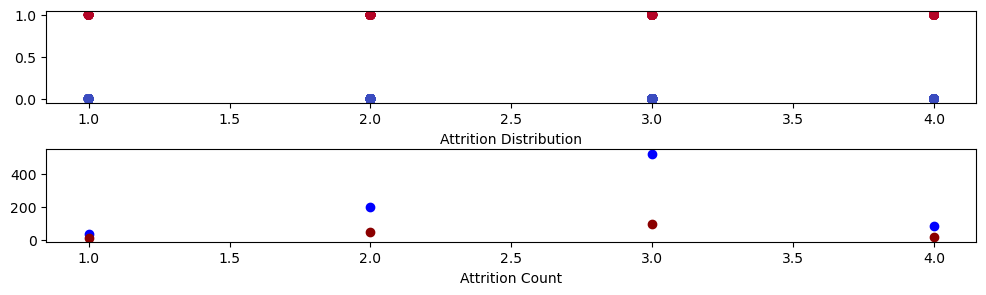

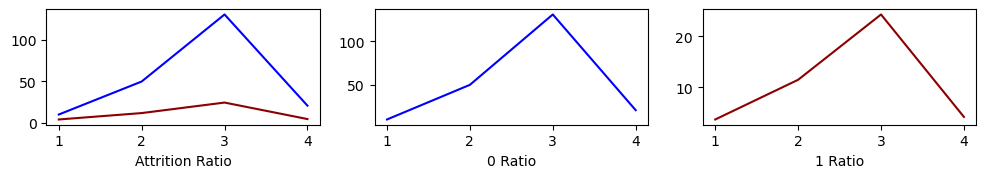

In [56]:
outlier_finder('WorkLifeBalance', threshold_value_must, threshold_ratio, threshold_value)
showhisto('WorkLifeBalance')

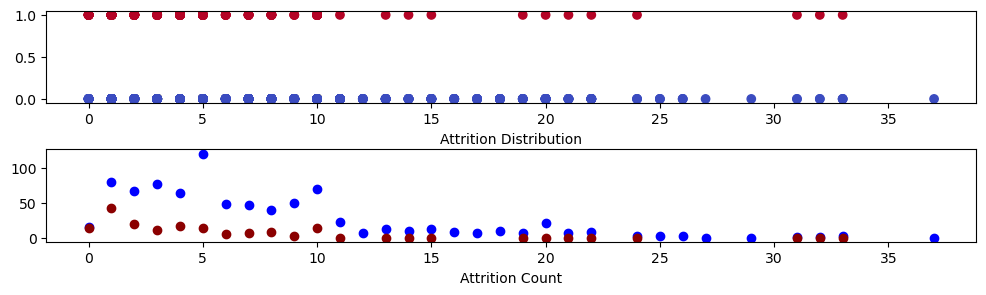

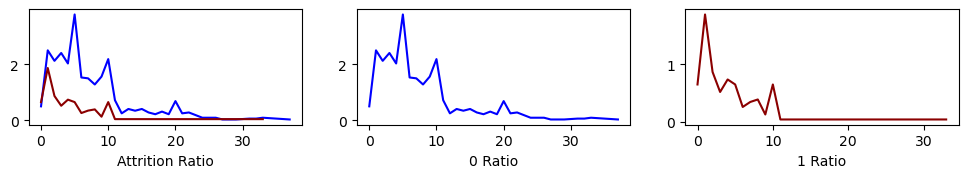

In [57]:
showhisto('YearsAtCompany')

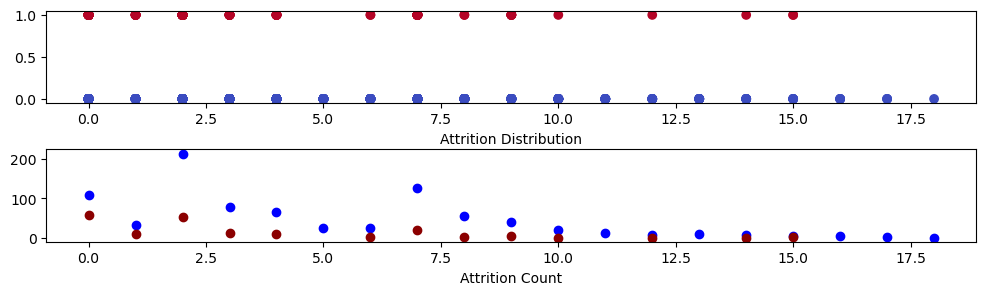

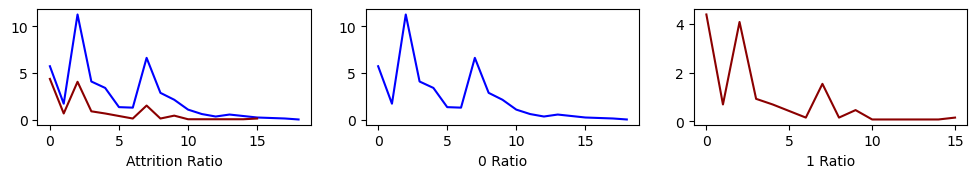

In [58]:
showhisto('YearsInCurrentRole')

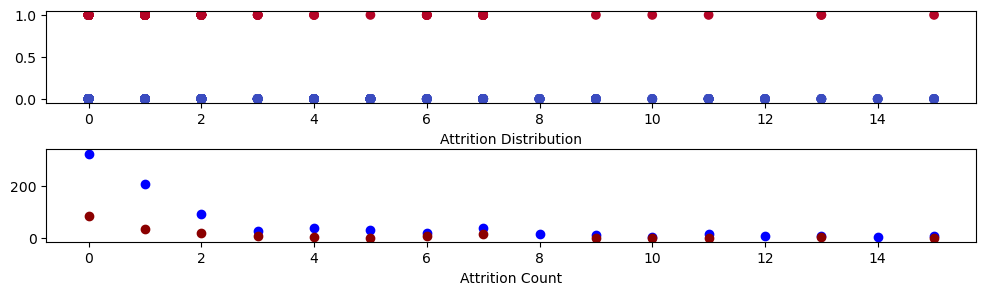

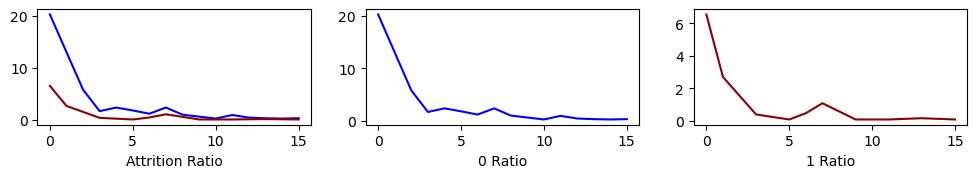

In [59]:
showhisto('YearsSinceLastPromotion')

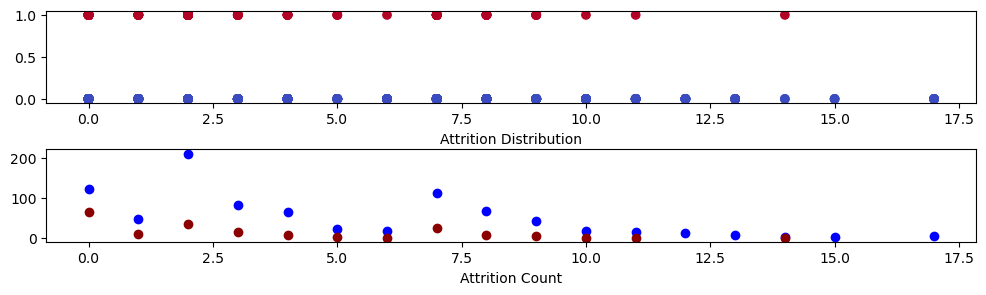

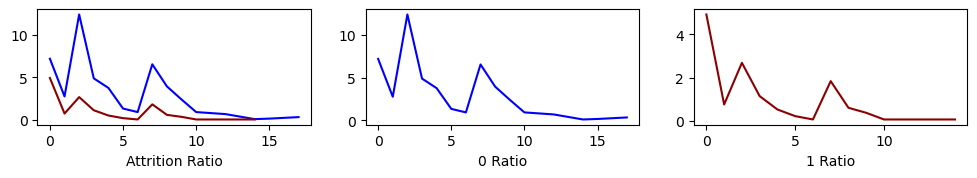

In [60]:
showhisto('YearsWithCurrManager')

In [61]:
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Divorced,Married,Single,Human Resources,Research & Development,Sales
0,50.000000,0,1,1126.0,1,1.000000,2,4,1,66,3,4,4,0,17399,6615,9,0,22,4,3,1,32,1,2,5,4,1,3,1.0,0.0,0.0,0.0,1.0,0.0
1,36.000000,0,1,216.0,1,6.000000,2,2,1,84,3,2,2,0,4941,2819,6,0,20,4,4,2,7,0,3,3,2,0,1,1.0,0.0,0.0,0.0,1.0,0.0
2,21.000000,1,1,337.0,2,7.000000,1,2,1,31,3,1,2,2,2679,4567,1,0,13,3,2,0,1,3,3,1,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
3,50.000000,0,2,1246.0,0,9.792581,3,1,1,99,3,5,2,1,18200,7999,1,0,11,3,3,1,32,2,3,32,5,10,7,0.0,1.0,0.0,1.0,0.0,0.0
4,52.000000,0,1,994.0,1,7.000000,4,2,1,87,3,3,2,2,10445,15322,7,0,19,3,4,0,18,4,3,8,6,4,0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,37.951525,0,1,750.0,1,28.000000,3,2,1,46,4,2,3,1,3407,25348,1,0,17,3,4,2,10,3,2,10,9,6,8,0.0,1.0,0.0,0.0,1.0,0.0
1015,41.000000,0,1,447.0,1,9.792581,3,2,1,85,4,2,2,2,6870,15530,3,0,12,3,1,0,11,3,1,3,2,1,2,0.0,0.0,1.0,0.0,1.0,0.0
1016,22.000000,1,2,1256.0,1,9.792581,4,3,1,48,2,1,4,1,2853,4223,0,1,11,3,2,1,1,5,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0
1017,29.000000,0,1,1378.0,1,13.000000,2,4,1,46,2,2,2,1,4025,23679,4,1,13,3,1,1,10,2,3,4,3,0,3,0.0,1.0,0.0,0.0,1.0,0.0


In [62]:
employee_droped = employee.copy()
print(drop_list)
for i, feature in enumerate(outlier_feature_list):
    for feature_value, label in zip(outlier_feature_values[i], outlier_feature_label_list[i]) :
        employee_droped.drop(employee_droped[(employee_droped[feature] == feature_value) & (employee_droped['Attrition'] == label)].index, axis=0, inplace=True)
employee_droped.drop(drop_list, axis = 1, inplace = True)

employee_droped.drop(employee_droped[(employee_droped['MonthlyIncome'] >= 12000) & (employee_droped['Attrition'] == 1)].index, axis=0, inplace = True)

['MaritalStatus', 'Department']


In [63]:
employee_droped.describe()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Divorced,Married,Single,Human Resources,Research & Development,Sales
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,37.855991,0.165183,1.095945,800.578398,9.954998,2.899110,2.686449,0.601385,66.755687,2.716123,2.023739,2.718101,6362.436202,14253.031652,2.642928,0.286845,15.266073,3.159248,2.690406,0.822948,11.095945,2.786350,2.749753,6.833828,4.166172,2.086053,3.962413,0.225519,0.461919,0.312562,0.041543,0.657765,0.300692
std,8.709523,0.371529,0.535561,402.549977,8.034209,1.052912,1.097073,0.489856,20.435183,0.706075,1.098798,1.096646,4703.122721,7047.271327,2.503482,0.452512,3.663498,0.366089,1.073579,0.878403,7.772998,1.279639,0.699142,5.921440,3.599791,3.059721,3.497180,0.418131,0.498794,0.463767,0.199641,0.474693,0.458786
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,467.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2809.500000,7987.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.951525,0.000000,1.000000,800.657803,9.000000,3.000000,3.000000,1.000000,68.000000,3.000000,2.000000,3.000000,4723.000000,14295.000000,1.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,0.000000,1.000000,1151.500000,14.000000,4.000000,4.000000,1.000000,84.000000,3.000000,3.000000,4.000000,8252.500000,20351.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,1496.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = ['BusinessTravel', 'Gender', 'DistanceFromHome','EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance']
poly = PolynomialFeatures(degree=2)
new_features = poly.fit_transform(employee_droped[poly_features])
poly_df = pd.DataFrame(new_features)
poly_df.columns = ['column_' + str(x) for x in poly_df.columns]
employee_with_poly = pd.concat([employee_droped.reset_index(drop=True), poly_df], axis=1)
employee_with_poly.drop(list(set(poly_features)), axis=1, inplace=True)                         
sc = StandardScaler()
employee_scaled = employee_with_poly
for feature in [x for x in employee_scaled.columns if x != 'Attrition']:
    employee_scaled[feature] = sc.fit_transform(employee_scaled[[feature]])

In [65]:
label = employee_scaled['Attrition']
data = employee_scaled.drop('Attrition', axis=1, inplace=False)
employee_scaled.shape

(1011, 70)

In [66]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #왜 PCA, LDA로 했는지 설명 필요
from itertools import combinations

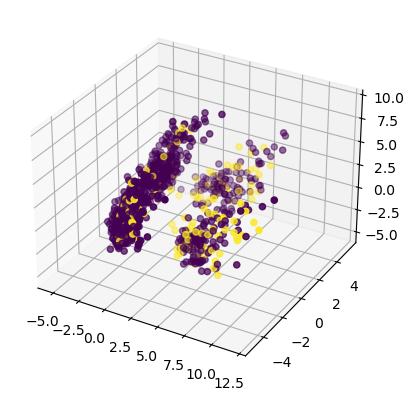

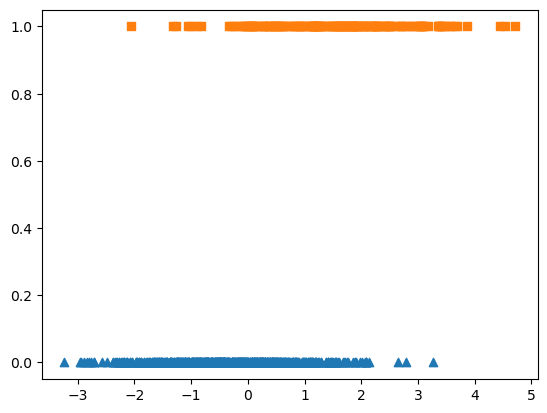

In [67]:
from mpl_toolkits.mplot3d import Axes3D

target_df = label
data_df = data

pca = PCA(n_components=3)
employee_pca = pca.fit_transform(data_df)
df = pd.DataFrame(employee_pca, columns=['comp1', 'comp2', 'comp3'])
df['target'] = label

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['comp1'], df['comp2'], df['comp3'], c=df['target'])
plt.show()

lda = LinearDiscriminantAnalysis(n_components = 1)
markers = ['^', 's']
employee_lda = lda.fit_transform(data_df, target_df)
df3 = pd.DataFrame(employee_lda, columns=['comp1'])
df3['target'] = label
for i, marker in enumerate(markers):
    x = df3[df3['target']==i].iloc[:,0]
    y = df3[df3['target']==i].iloc[:,1]
    plt.scatter(x, y, marker=marker)
plt.show()

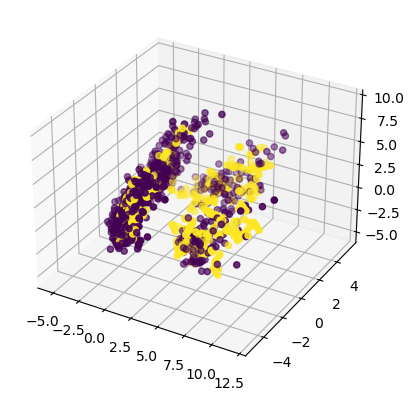

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Binarizer
smote = SMOTE()
X, Y = df.drop('target', axis=1), df['target']
data_, label_ = smote.fit_resample(X, Y)
oversampled = pd.DataFrame(data_, columns=['comp1', 'comp2', 'comp3'])
oversampled['target'] = label_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(oversampled['comp1'], oversampled['comp2'], oversampled['comp3'], c=oversampled['target'])
plt.show()

In [69]:
for feature in [x for x in df.columns if x != 'target']: #학습 전 정규화
    df[feature] = sc.fit_transform(df[[feature]])

In [70]:
df['target'].value_counts()

target
0    844
1    167
Name: count, dtype: int64

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve

def show_roc_prc(model, th):
    global X_now, y_now, X_test, y_test
    bn = Binarizer(threshold = th)
    y_hat = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_binarized = bn.transform(y_prob[:,1].reshape(-1, 1))
    y_train_data = model.predict(X_now)
    
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    axs[0][0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[0][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[0][0].set_xlim([0.0, 1.0])
    axs[0][0].set_ylim([0.0, 1.05])
    axs[0][0].set_xlabel('False Positive Rate')
    axs[0][0].set_ylabel('True Positive Rate')
    axs[0][0].legend(loc='lower right')
    
    precision, recalls, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    boundary = thresholds.shape[0]
    axs[0][1].plot(thresholds, precision[:boundary], linestyle='--', label='Precision')
    axs[0][1].plot(thresholds, recalls[:boundary])
    axs[0][1].legend(loc='lower right')
    
    conf_matrix = confusion_matrix(y_test, y_hat)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', ax=axs[1][0])
    axs[1][0].set_xlabel('Predicted labels')
    axs[1][0].set_ylabel('True labels')
    axs[1][0].set_title('y_hat')
    
    conf_matrix = confusion_matrix(y_test, y_binarized)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', ax=axs[1][1])
    axs[1][1].set_xlabel('Predicted labels')
    axs[1][1].set_ylabel('True labels')
    axs[1][1].set_title('y_binarized')
    print('test\t\t: ', accuracy_score(y_test, y_hat))
    print('binarized\t: ', accuracy_score(y_test, y_binarized))
    print('train\t\t: ', accuracy_score(y_now, y_train_data))
    plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

smote = SMOTE()

X, Y = df.drop('target', axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1030)
X_Smote, y_Smote = smote.fit_resample(X_train, y_train)
print(X_train.shape, X_Smote.shape)
print()
print(y_train.value_counts())
print()
print(y_Smote.value_counts())

(808, 3) (1350, 3)

target
0    675
1    133
Name: count, dtype: int64

target
0    675
1    675
Name: count, dtype: int64


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 4, 5,7, 9, 10, 15, 20, 25, 30, 35, 40], 
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid = param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_Smote, y_Smote)
print(grid_search.best_params_)
print(grid_search.best_score_)
knn = grid_search.best_estimator_

{'n_neighbors': 4, 'weights': 'distance'}
0.777037037037037


test		:  0.6059113300492611
binarized	:  0.6600985221674877
train		:  1.0


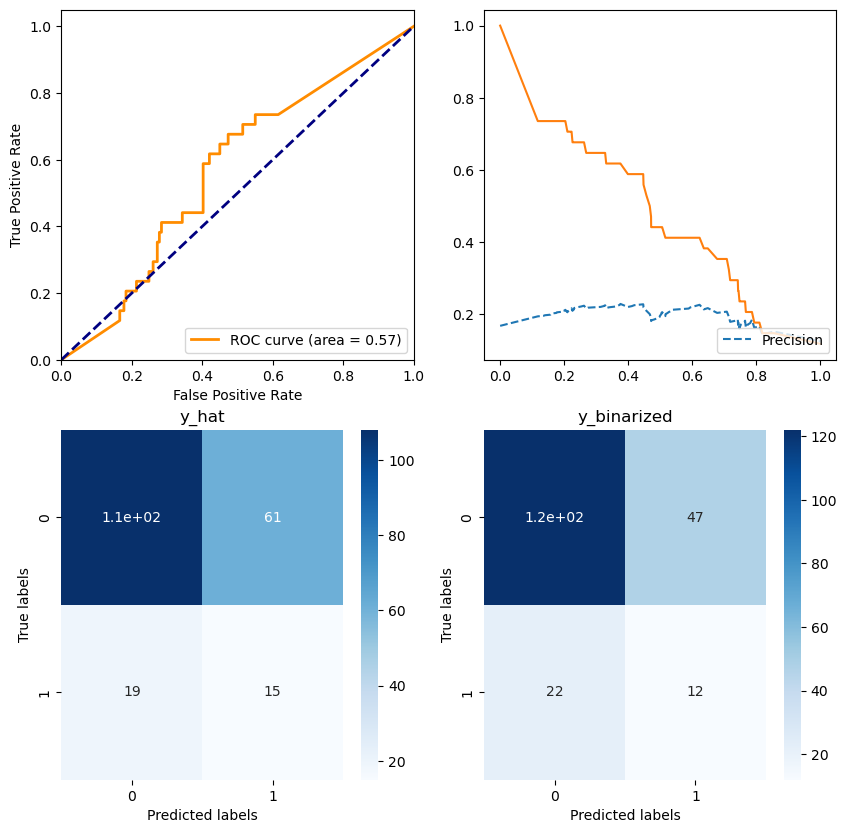

In [117]:
X_now, y_now = X_Smote, y_Smote
show_roc_prc(knn, 0.65)

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

param_grid = {'max_depth' : [10, 12, 15, 20, 25, 30, 35, 40, 50, 60],
             'min_samples_split' : [ 9, 10, 15, 20, 25, 30, 35, 40, 60],
             'min_samples_leaf' : [3, 5, 7, 9, 10, 12, 14, 16, 18, 20, 30, 40, 60]}

grid_search = GridSearchCV(dt_clf,param_grid=param_grid, scoring='accuracy', cv = 3)
grid_search.fit(X_Smote, y_Smote)
dt_clf = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.7133333333333333


test		:  0.6354679802955665
binarized	:  0.6551724137931034
train		:  0.8555555555555555


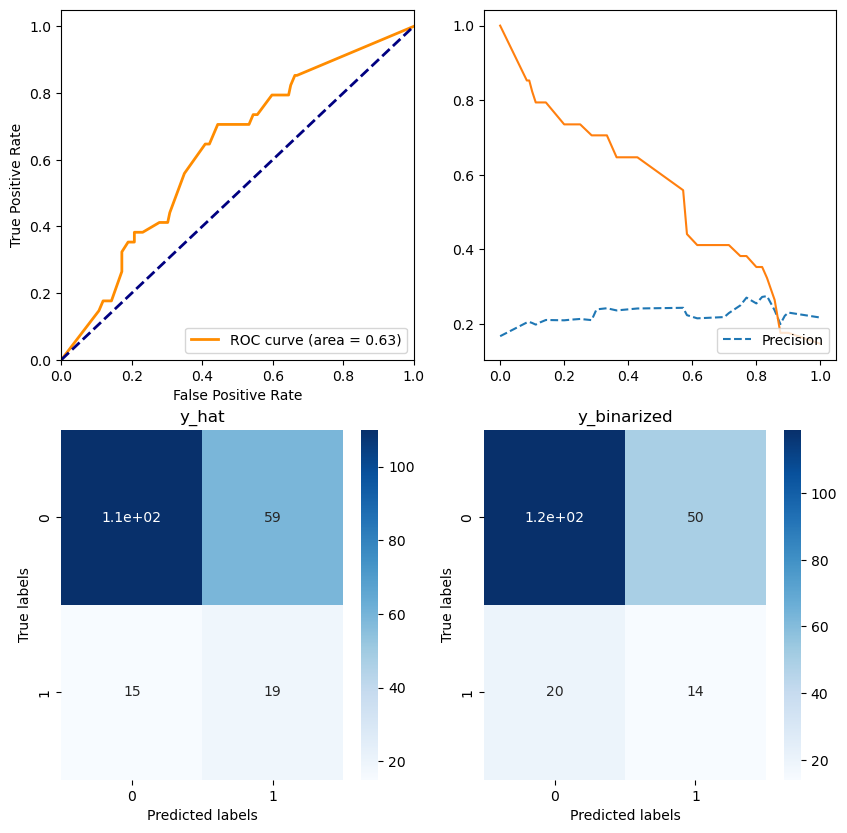

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=35, min_samples_leaf=7, min_samples_split=10)
dt_clf.fit(X_Smote, y_Smote)
X_now, y_now = X_Smote, y_Smote
show_roc_prc(dt_clf, 0.65)

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth' : [4, 6, 8, 10,15, 20],
              'gamma' : [0, 0.1, 0.2]}
grid_search = GridSearchCV(xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3)
grid_search.fit(X_Smote, y_Smote)
xgb = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}
0.7881481481481482


test		:  0.6847290640394089
binarized	:  0.6995073891625616
train		:  1.0


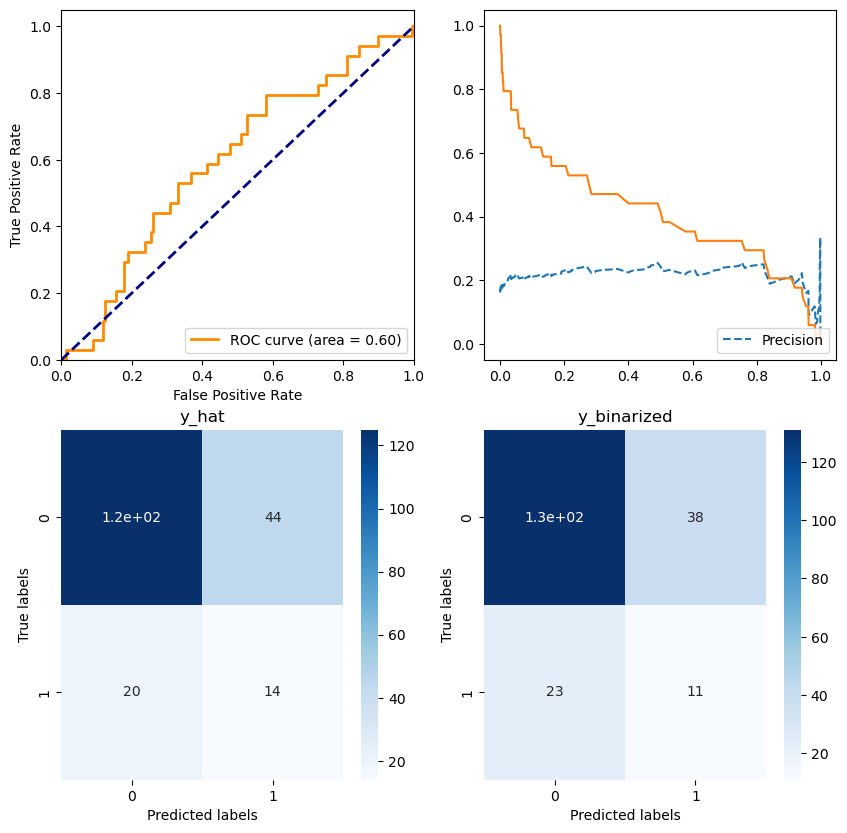

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0, learning_rate=0.5, max_depth=15, n_estimators=50)
xgb.fit(X_Smote, y_Smote)
X_now, y_now = X_Smote, y_Smote
show_roc_prc(xgb, 0.65)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'learning_rate': [0.05, 0.1, 0.2, 0.4, 0.6],
              'min_samples_split': [10, 20, 30, 40, 50],
              'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
grid_search = GridSearchCV(gbc, param_grid=param_grid,
                           scoring='accuracy', cv=3)
grid_search.fit(X_Smote, y_Smote)
gbc = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.6, 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 200}
0.7555555555555555


test		:  0.6403940886699507
binarized	:  0.6551724137931034
train		:  0.9837037037037037


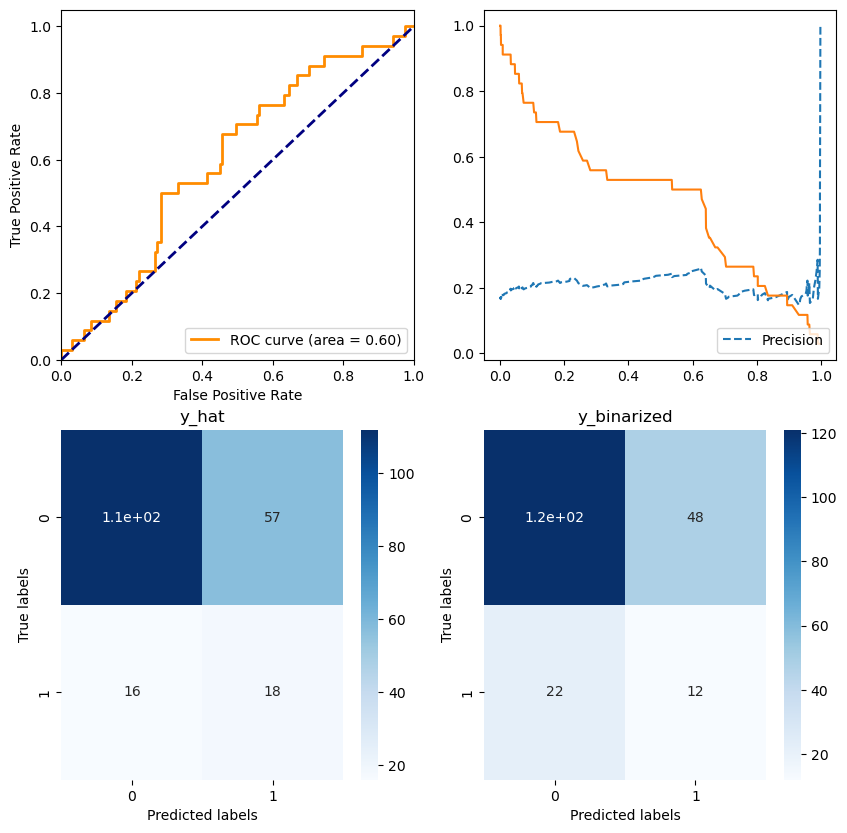

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.6, min_samples_leaf=20, min_samples_split=50, n_estimators=200)
gbc.fit(X_Smote, y_Smote)
X_now, y_now = X_Smote, y_Smote
show_roc_prc(gbc, 0.65)

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 500, 600],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [3, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [4, 6, 8, 10, 15]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_Smote, y_Smote)
rfc = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 300}
0.7755555555555556


test		:  0.6748768472906403
binarized	:  0.7783251231527094
train		:  0.9148148148148149


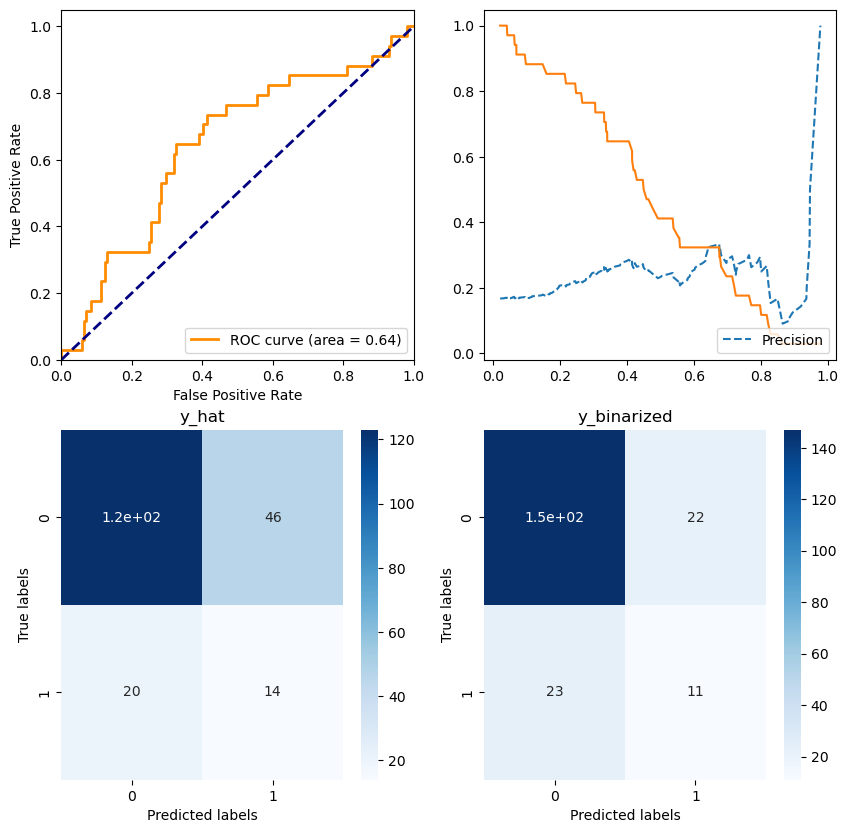

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=50)
rfc.fit(X_Smote, y_Smote)
X_now, y_now = X_Smote, y_Smote
show_roc_prc(rfc, 0.65)

In [111]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

class MyVoter(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.XGB = XGBClassifier(gamma=0, learning_rate=0.1, max_depth=20, n_estimators=200)
        self.DTC = DecisionTreeClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=10)
        self.GBC = GradientBoostingClassifier(learning_rate=0.6, min_samples_leaf=30, min_samples_split=10, n_estimators=200)
        self.KNN = KNeighborsClassifier(n_neighbors=4, weights='distance')
        self.RFC = RandomForestClassifier(max_depth=30, min_samples_leaf=4,min_samples_split=3, n_estimators=300)
        self.classes_ = None
    def fit(self, X, y):
        self.classes_ = list(set(y))
        self.XGB.fit(X, y)
        self.DTC.fit(X, y)
        self.GBC.fit(X, y)
        #self.lr.fit(X, y)
        self.RFC.fit(X, y)
        self.KNN.fit(X, y)
    
    def predict(self, X):
        final_prediction = []
        pred1 = Binarizer(threshold=0.65).transform(self.XGB.predict_proba(X)[:, 1].reshape(1, -1))
        pred2 = Binarizer(threshold=0.65).transform(self.DTC.predict_proba(X)[:, 1].reshape(1, -1))
        pred3 = Binarizer(threshold=0.65).transform(self.KNN.predict_proba(X)[:, 1].reshape(1, -1))
        pred4 = Binarizer(threshold=0.65).transform(self.GBC.predict_proba(X)[:, 1].reshape(1, -1))
        pred5 = Binarizer(threshold=0.65).transform(self.RFC.predict_proba(X)[:, 1].reshape(1,-1))
        for i in range(len(X)):
            votes = [pred1[0][i], pred2[0][i], pred3[0][i], pred4[0][i], pred5[0][i]]
            majority_vote = Counter(votes).most_common(1)[0][0]
            final_prediction.append(majority_vote)
            
        return final_prediction
    def score(self, X, y):
        pred = self.predict(X)
        correct_predictions = (predictions==y).sum()
        accuracy = correct_predictions / len(y)
        return accuracy

0.7241379310344828


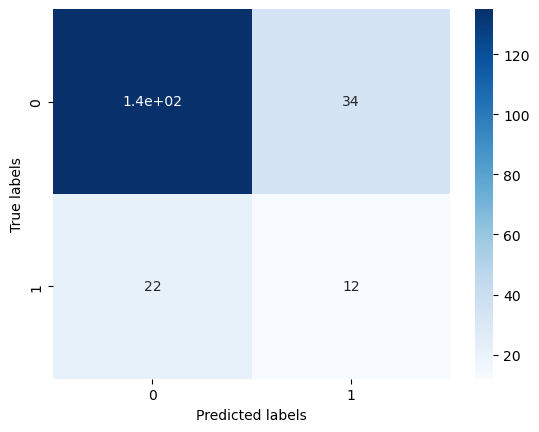

0.8353940061498921


In [118]:
voting = MyVoter()
voting.fit(X_Smote, y_Smote)
pred = voting.predict(X_test)
print(accuracy_score(y_test, pred))
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
scores = cross_val_score(voting, X_train, y_train, cv=3, scoring='accuracy')
print(np.mean(scores))